In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.pyplot as pp
from pprint import pprint

import numpy as np
import pandas as pd
from math import ceil

from scipy.spatial import Voronoi, voronoi_plot_2d

#############
def show(items):
    display(pd.DataFrame(items).head())


Polygon(Point2D(0, 5/2), Point2D(5, 0), Point2D(10, 5/2), Point2D(10, 15/2), Point2D(5, 10), Point2D(0, 15/2))


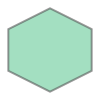

In [2]:
### construct map boundary
from math import fabs, sqrt
from collections import namedtuple
from scipy.spatial.distance import euclidean
from sympy.geometry import Line, Segment, Point, Polygon, convex_hull
from sympy.plotting import plot

### size
x_size        = 10
y_size        = 10
####################################
def square_boundary(x_size, y_size):
    ### corners
    top_left      = Point(      0,      0 )
    top_right     = Point( x_size,      0 )
    bottom_left   = Point(      0, y_size )
    bottom_right  = Point( x_size, y_size )

    corners       = [top_left, top_right, bottom_left, bottom_right]
    
    ### polygon
    map_boundary  = convex_hull(corners)
    
    return map_boundary, corners

####################################
def hex_boundary(x, y, h = 4):
    ### corners
    T  = Point( x/2, y )
    B  = Point( x/2, 0 ) 
    
    LB = Point(   0, (1/h)*y )
    LT = Point(   0, ((h-1)/h)*y )
    
    RB = Point(   x, (1/h)*y )
    RT = Point(   x, ((h-1)/h)*y )
    
    corners = [T, B, LT, RT, LB, RB]

    ### polygon
    map_boundary  = convex_hull(*corners)
    
    return map_boundary, corners

####################################


# map_boundary, corners = square_boundary(x_size, y_size)
map_boundary, corners = hex_boundary(x_size, y_size, 4)

print(map_boundary)
display(map_boundary)

#plot(map_boundary)

In [3]:
### generate sites -- 9square
points = pd.DataFrame([
    [0.1, 0.5], 
    [0.5, 1.5], 
    [0.5, 2.5], 
    
    [1.5, 0.5], 
    [1.5, 1.5], 
    [1.5, 2.5], 
    
    [2.5, 0.5], 
    [2.5, 1.5], 
    [2.5, 2.5]]
)

display(points)

,0,1
0,0.1,0.5
1,0.5,1.5
2,0.5,2.5
3,1.5,0.5
4,1.5,1.5
5,1.5,2.5
6,2.5,0.5
7,2.5,1.5
8,2.5,2.5


In [4]:
### generate sites -- random points
tile_area  = 1
total_area = x_size * y_size
num_tiles  = total_area / tile_area

coords = np.random.random( (total_area, 2) )
points = pd.DataFrame(np.array([(x * x_size, y * y_size) for (x,y) in coords]))

#display(points) 
display(points.head())

,0,1
0,5.266211,8.425392
1,7.333889,6.385845
2,7.500048,8.629297
3,0.071031,6.343723
4,4.145209,0.555849


In [13]:
### generate sites -- sunflower spirals
num_pts  = 100

indices  = np.arange(0, num_pts, dtype=float) + 0.5
print('indices')
show(indices)

r        = np.sqrt(indices/num_pts)
theta    = np.pi * (1 + 5**0.5) * indices

### raw 2d data
raw      = pd.DataFrame(
    [(r[i]*np.cos(theta[i]), r[i]*np.sin(theta[i]) ) 
        for i in range(num_pts)], 
    columns = ['x','y']
)

print('\nraw')
display(raw.head())

### calculate scale and offset
x_radius = ceil(abs(min(raw.x)))
y_radius = ceil(abs(min(raw.y)))

x_clipscale = 2
y_clipscale = 2

x_scale  =  x_size/(2*x_radius)
y_scale  =  y_size/(2*y_radius)

print('\nxs')
print(raw.x.head())
print(min(raw.x), max(raw.x))
print('x_radius:', x_radius)
print('x_scale: ', x_scale)

print('\nys')
print(raw.y.head())
print(min(raw.y), max(raw.y))
print('y_radius:', y_radius)
print('y_scale: ', y_scale)

### rescale and offset
coords   = (raw + (x_radius, y_radius)) * (x_scale, y_scale) 


print('\ncoords')
print(min(coords.x), max(coords.x))
print(min(coords.y), max(coords.y))
display(coords)

points = coords

### filter inside map boundary
# points   = pd.DataFrame([(coord.x, coord.y) for coord in coords.itertuples() if map_boundary.encloses_point(Point(coord.x, coord.y))])

# print('\npoints')
# display(points.head())
# print('len points:', len(points))

indices


,0
0,0.5
1,1.5
2,2.5
3,3.5
4,4.5



raw


,x,y
0,0.025624,-0.065905
1,-0.109833,0.054191
2,0.151812,0.044193
3,-0.097129,-0.159893
4,-0.041258,0.208081



xs
0    0.025624
1   -0.109833
2    0.151812
3   -0.097129
4   -0.041258
Name: x, dtype: float64
-0.9677103054728203 0.9968754573433741
x_radius: 1
x_scale:  5.0

ys
0   -0.065905
1    0.054191
2    0.044193
3   -0.159893
4    0.208081
Name: y, dtype: float64
-0.9860739585482673 0.9420795831022272
y_radius: 1
y_scale:  5.0

coords
0.16144847263589834 9.984377286716871
0.06963020725866353 9.710397915511136


,x,y
0,5.128119,4.670477
1,4.450835,5.270957
2,5.759061,5.220967
3,4.514353,4.200533
4,4.793710,6.040406
5,5.945123,4.305923
6,3.732700,4.862338
7,5.903892,6.028581
8,5.030122,3.542573
9,3.935741,6.114609


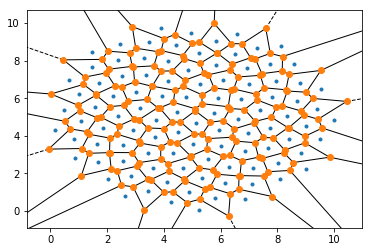

points


,0,1
0,5.128119,4.670477
1,4.450835,5.270957
2,5.759061,5.220967
3,4.514353,4.200533
4,4.793710,6.040406


vertices


,0,1
0,-1.197188,16.817823
1,1.172878,6.734281
2,2.891798,9.808807
3,1.669319,-7.590457
4,9.017821,6.318955




regions


,0,1,2,3,4,5,6
0,9.0,1.0,6.0,5.0,-1.0,8.0,NaN
1,21.0,17.0,18.0,3.0,-1.0,20.0,NaN
2,24.0,4.0,15.0,14.0,-1.0,23.0,NaN
3,30.0,28.0,6.0,1.0,29.0,NaN,NaN
4,40.0,17.0,21.0,22.0,37.0,NaN,NaN




point_region


,0
0,84
1,58
2,86
3,42
4,54




ridge_dict


0             1             2   3          ...   94   95       96          \
    2    5    8   0   2    6    5   0   1   6  ...   89   61   74  62  83  88   
0   52  165   82  34  52   35  167  34  34   7 ...   -1  137   98  13  13  -1   
1  167  167  165  52  95  136  168  82  35  35 ...  171  138  138  55  14  56   

    97       99      
    63   89  86  94  
0  110   -1  25  -1  
1  162  160  79  25  

[2 rows x 284 columns]



ridge_points


,0,1
0,90,95
1,90,98
2,90,56
3,90,69
4,90,77




ridge_vertices


,0,1
0,-1,8
1,-1,5
2,1,6
3,1,9
4,5,6


In [14]:
### construct Voronoi object

vor = Voronoi(points)

voronoi_plot_2d( vor )
matplotlib.pyplot.show()

#############
print('points')
show(vor.points)

print('vertices')
show(vor.vertices)

print('\n')
print('regions')
show(vor.regions)

print('\n')
print('point_region')
show(vor.point_region)

print('\n')
print('ridge_dict')
show(vor.ridge_dict)

print('\n')
print('ridge_points')
show(vor.ridge_points)

print('\n')
print('ridge_vertices')
show(vor.ridge_vertices)


In [15]:
### calculate missing ridge vertices and out-of-bounds cutoff vertices

sites            = list()
site_vertices    = dict()
site_adjs        = dict()

adj_ridges       = dict()


##################
m0 = 20; m1 = 50; m2 = 50; m3 = 10

print(f'{f"points : vertices  ":>{m0}} |'
      f'{f"  adjacency line":<{m1}} |'
      f'{f"  ridge line":<{m2}} |'
      f'{f"  missing":<{m3}} |'
     )

######################################################
def find_vertex(i, i0, vor, adj_line, map_boundary) -> (Point, None):
    ''' Deference a Voronoi ridge vertex ID into a vertex point,
            and clip it inside the map boundary.
    '''
    
    ### cut off infinite vertices
    if i < 0:
        v0 = Point(*vor.vertices[i0])
        
        ### don't materialize an infinite vertex if the other vertex is out of bounds
        if not map_boundary.encloses_point(v0):
            v = None
        
        else:
            ridge_line = adj_line.perpendicular_line(v0)       
            v          = min( ridge_line.intersection(map_boundary), 
                                key = lambda p: v0.distance(p)
                            )
            
    ### finite vertex
    else:
        v = Point(*vor.vertices[i])
        
        ### cut off out-of-bounds vertices
        if not map_boundary.encloses_point(v):
            v0         = Point(*vor.vertices[i0])
            ridge_line = Line(v, v0)
            points     = ridge_line.intersection(map_boundary)
            if len(points) > 0:
                v      = min( points, key = lambda p: v.distance(p))
            else:
                v      = None
    ###
    return v


######################################################
for (pi1, pi2), (vi1, vi2)  in vor.ridge_dict.items():
        
    ### dereference points
    p1         = Point( *vor.points[pi1] )
    p2         = Point( *vor.points[pi2] )
    adj_line   = Line(p1, p2)   

    #if any([
    #    not map_boundary.encloses_point(p1),
    #    not map_boundary.encloses_point(p2)
    #]):
#         continue

    if -1 in (vi1, vi2):
        continue

    v1         = find_vertex(vi1, vi2, vor, adj_line, map_boundary)
    v2         = find_vertex(vi2, vi1, vor, adj_line, map_boundary) 

    missing = True if any([vi1 < 0, vi2 < 0]) else False

    ps              = (p1, p2)
    vs              = (v1, v2)
    
    # initialize new sites
    if p1 not in sites:
        sites.append(p1)
        site_vertices[p1] = set()
    if p2 not in sites:
        sites.append(p2)
        site_vertices[p2] = set()
        
    ### insert only in-bounds vertices
    if None not in vs:
        site_vertices[p1].update(vs)
        site_vertices[p2].update(vs)
        
    
    print(f'{f"  [{pi1} {pi2}] : [{vi1} {vi2}]":<{m0}} |'
          f'{f"  {ps}":<{m1}} |'
          f'{f"  {vs}":<{m2}} |'
          f'{f"  {missing}":<{m3}} |'
         )


 points : vertices   |  adjacency line                                   |  ridge line                                       |  missing  |
  [90 56] : [1 6]    |  (Point2D(33503637934673/50000000000000, 348447068074569/50000000000000), Point2D(171891337712479/100000000000000, 85411073241139/12500000000000)) |  (Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(61174144300151/50000000000000, 11131865189719/1562500000000)) |  False    |
  [90 69] : [1 9]    |  (Point2D(33503637934673/50000000000000, 348447068074569/50000000000000), Point2D(394279280737/390625000000, 620405654113157/100000000000000)) |  (Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000)) |  False    |
  [90 77] : [5 6]    |  (Point2D(33503637934673/50000000000000, 348447068074569/50000000000000), Point2D(147779863262647/100000000000000, 763990483307107/100000000000000)) |  (Point2D(208621235473369840

In [16]:
### add map boundary vertices to corner tiles

### corner_distances[corner][distance] = site
corner_distances = dict()

for corner in corners:
    corner_distances[corner] = dict()

### distances from each site to each corner
for site in sites:
    for corner, distances in corner_distances.items():
        d = site.distance(corner).evalf()
        distances[d] = site
        print('D', site, corner, d)

### insert each corner into the site with minimum distance
def add_corner(site, corner):
    print(corner, site)
    site_vertices[site].add(corner)

for corner, distances in corner_distances.items():
    add_corner(distances[min(distances.keys())], corner)
    


D Point2D(33503637934673/50000000000000, 348447068074569/50000000000000) Point2D(5, 10) 5.28541260310737
D Point2D(33503637934673/50000000000000, 348447068074569/50000000000000) Point2D(5, 0) 8.20453616086332
D Point2D(33503637934673/50000000000000, 348447068074569/50000000000000) Point2D(0, 15/2) 0.854997531854738
D Point2D(33503637934673/50000000000000, 348447068074569/50000000000000) Point2D(10, 15/2) 9.34502892481390
D Point2D(33503637934673/50000000000000, 348447068074569/50000000000000) Point2D(0, 5/2) 4.51889747553444
D Point2D(33503637934673/50000000000000, 348447068074569/50000000000000) Point2D(10, 5/2) 10.3449977873619
D Point2D(171891337712479/100000000000000, 85411073241139/12500000000000) Point2D(5, 10) 4.56027865454391
D Point2D(171891337712479/100000000000000, 85411073241139/12500000000000) Point2D(5, 0) 7.57983235915618
D Point2D(171891337712479/100000000000000, 85411073241139/12500000000000) Point2D(0, 15/2) 1.84382875419392
D Point2D(171891337712479/100000000000000, 

In [17]:
### all tile vertices have now been computed

print("sites")
display(sites)

print('\n\nsite_vertices')
pprint(site_vertices)

sites


[Point2D(33503637934673/50000000000000, 348447068074569/50000000000000),
 Point2D(171891337712479/100000000000000, 85411073241139/12500000000000),
 Point2D(394279280737/390625000000, 620405654113157/100000000000000),
 Point2D(147779863262647/100000000000000, 763990483307107/100000000000000),
 Point2D(471851822006153/1000000000000000, 267383474777141/50000000000000),
 Point2D(263433610579913/100000000000000, 406639403992089/500000000000000),
 Point2D(424884240964013/100000000000000, 465602325066233/1000000000000000),
 Point2D(342954856823857/100000000000000, 53730527714583/50000000000000),
 Point2D(142510636663543/50000000000000, 183718247320379/100000000000000),
 Point2D(202460753330013/100000000000000, 84002713357223/50000000000000),
 Point2D(954767331720217/100000000000000, 648110344000931/100000000000000),
 Point2D(434484638935773/50000000000000, 587244896624101/100000000000000),
 Point2D(6861586223397/781250000000, 682076753663407/100000000000000),
 Point2D(859535684173767/10000000



site_vertices
{Point2D(184919803029539/25000000000000, 536109213206881/100000000000000): {Point2D(97412887829451/12500000000000, 498523166382069/100000000000000),
                                                                            Point2D(684242613725333/100000000000000, 539945454253237/100000000000000),
                                                                            Point2D(728708736601651/100000000000000, 118209339403981/20000000000000),
                                                                            Point2D(722316232304883/100000000000000, 95330887760347/20000000000000),
                                                                            Point2D(796578674682803/100000000000000, 551071787154289/100000000000000)},
 Point2D(782075415272007/100000000000000, 304045027752617/50000000000000): {Point2D(728708736601651/100000000000000, 118209339403981/20000000000000),
                                                                            Point2D

------------
Point2D(33503637934673/50000000000000, 348447068074569/50000000000000)
6 {Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000), Point2D(20862123547336984004910069939/32394822225256450000000000000, 506784456926183734004910069939/64789644450512900000000000000), Point2D(0, 15/2), Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(0, 22606668251150120859891637312253/3629778246358110100000000000000), Point2D(61174144300151/50000000000000, 11131865189719/1562500000000)}
Polygon(Point2D(0, 22606668251150120859891637312253/3629778246358110100000000000000), Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000), Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(61174144300151/50000000000000, 11131865189719/1562500000000), Point2D(20862123547336984004910069939/32394822225256450000000000000, 506784456926183734004910069939/64789644450512900000000000000), Point2D(0, 15/2))


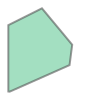

31043791262491147034585786158315198094068912587622529449932359/23517204201574817401551101967029000000000000000000000000000000
[Segment2D(Point2D(0, 22606668251150120859891637312253/3629778246358110100000000000000), Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000)), Segment2D(Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000), Point2D(58643877333549/50000000000000, 336714067208637/50000000000000)), Segment2D(Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(61174144300151/50000000000000, 11131865189719/1562500000000)), Segment2D(Point2D(20862123547336984004910069939/32394822225256450000000000000, 506784456926183734004910069939/64789644450512900000000000000), Point2D(61174144300151/50000000000000, 11131865189719/1562500000000)), Segment2D(Point2D(0, 15/2), Point2D(20862123547336984004910069939/32394822225256450000000000000, 506784456926183734004910069939/64789644450512900000000000000)), Segment2D(Point2D(0, 2260666

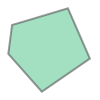

1547100900195574294396093767/2000000000000000000000000000
[Segment2D(Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(162581336941593/100000000000000, 124463952519369/20000000000000)), Segment2D(Point2D(162581336941593/100000000000000, 124463952519369/20000000000000), Point2D(227497967216643/100000000000000, 66705157132739/10000000000000)), Segment2D(Point2D(39561286263229/20000000000000, 734984159058277/100000000000000), Point2D(227497967216643/100000000000000, 66705157132739/10000000000000)), Segment2D(Point2D(61174144300151/50000000000000, 11131865189719/1562500000000), Point2D(39561286263229/20000000000000, 734984159058277/100000000000000)), Segment2D(Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(61174144300151/50000000000000, 11131865189719/1562500000000))] 

------------
Point2D(394279280737/390625000000, 620405654113157/100000000000000)
5 {Point2D(40505794446283/25000000000000, 616187044204171/100000000000000), Poi

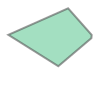

907862380589845116723851269969/1000000000000000000000000000000
[Segment2D(Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000), Point2D(984478502186663/1000000000000000, 140569928434527/25000000000000)), Segment2D(Point2D(984478502186663/1000000000000000, 140569928434527/25000000000000), Point2D(40505794446283/25000000000000, 616187044204171/100000000000000)), Segment2D(Point2D(40505794446283/25000000000000, 616187044204171/100000000000000), Point2D(162581336941593/100000000000000, 124463952519369/20000000000000)), Segment2D(Point2D(58643877333549/50000000000000, 336714067208637/50000000000000), Point2D(162581336941593/100000000000000, 124463952519369/20000000000000)), Segment2D(Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000), Point2D(58643877333549/50000000000000, 336714067208637/50000000000000))] 

------------
Point2D(147779863262647/100000000000000, 763990483307107/100000000000000)
6 {Point2D(61174144300151/50000000000000, 11131865189719/1

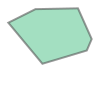

7608912830576103910437022542824117772167138726772309031347/8498288552219093398083293155540000000000000000000000000000
[Segment2D(Point2D(20862123547336984004910069939/32394822225256450000000000000, 506784456926183734004910069939/64789644450512900000000000000), Point2D(61174144300151/50000000000000, 11131865189719/1562500000000)), Segment2D(Point2D(61174144300151/50000000000000, 11131865189719/1562500000000), Point2D(39561286263229/20000000000000, 734984159058277/100000000000000)), Segment2D(Point2D(39561286263229/20000000000000, 734984159058277/100000000000000), Point2D(206095018758473/100000000000000, 754386672117057/100000000000000)), Segment2D(Point2D(182767758613379/100000000000000, 806644701121989/100000000000000), Point2D(206095018758473/100000000000000, 754386672117057/100000000000000)), Segment2D(Point2D(36228429884447133660686293017/32791847463795650000000000000, 528106141841381883660686293017/65583694927591300000000000000), Point2D(182767758613379/100000000000000, 80664470112

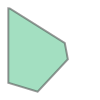

1815873098452668382091854445138407932334398795658230593177/1837599444941137028090098179645000000000000000000000000000
[Segment2D(Point2D(0, 2994427300660452701506061011/607508003041740000000000000), Point2D(102213702773103/200000000000000, 119369494361911/25000000000000)), Segment2D(Point2D(102213702773103/200000000000000, 119369494361911/25000000000000), Point2D(12969750081797/12500000000000, 21359717450537/4000000000000)), Segment2D(Point2D(984478502186663/1000000000000000, 140569928434527/25000000000000), Point2D(12969750081797/12500000000000, 21359717450537/4000000000000)), Segment2D(Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000), Point2D(984478502186663/1000000000000000, 140569928434527/25000000000000)), Segment2D(Point2D(0, 22606668251150120859891637312253/3629778246358110100000000000000), Point2D(124489838997751/5000000000000000, 38906679250767/6250000000000)), Segment2D(Point2D(0, 2994427300660452701506061011/607508003041740000000000000), Point2D(0, 226

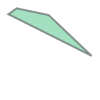

24883298764069376297838881635629193796644210791191321099049/163806764545109229377299017454588000000000000000000000000000
[Segment2D(Point2D(57986481591840074745841937227/24129948757616150000000000000, 62663262196240675254158062773/48259897515232300000000000000), Point2D(2943471657197925404276278251121/848565646525703890000000000000, 1299356575430594045723721748879/1697131293051407780000000000000)), Segment2D(Point2D(145943806261029/50000000000000, 16099956157173/12500000000000), Point2D(2943471657197925404276278251121/848565646525703890000000000000, 1299356575430594045723721748879/1697131293051407780000000000000)), Segment2D(Point2D(50211911549227/20000000000000, 68703853938601/50000000000000), Point2D(145943806261029/50000000000000, 16099956157173/12500000000000)), Segment2D(Point2D(57986481591840074745841937227/24129948757616150000000000000, 62663262196240675254158062773/48259897515232300000000000000), Point2D(50211911549227/20000000000000, 68703853938601/50000000000000))] 

--------

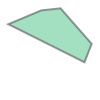

144385561900311720648848405485014980743796836901889081286219/258958504305845707166165572754740000000000000000000000000000
[Segment2D(Point2D(2943471657197925404276278251121/848565646525703890000000000000, 1299356575430594045723721748879/1697131293051407780000000000000), Point2D(6283085023921329999860472689/1335127648611163750000000000, 392553219134488750139527311/2670255297222327500000000000)), Segment2D(Point2D(6283085023921329999860472689/1335127648611163750000000000, 392553219134488750139527311/2670255297222327500000000000), Point2D(482314576184641/100000000000000, 27846753900719/62500000000000)), Segment2D(Point2D(215835038767027/50000000000000, 102363367498301/100000000000000), Point2D(482314576184641/100000000000000, 27846753900719/62500000000000)), Segment2D(Point2D(40025658774669/10000000000000, 989887301028289/1000000000000000), Point2D(215835038767027/50000000000000, 102363367498301/100000000000000)), Segment2D(Point2D(2943471657197925404276278251121/8485656465257038900000000

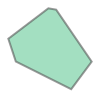

1655235902567143360363144818459074539319164810126204395824931/2566961984672735615316762935766220000000000000000000000000000
[Segment2D(Point2D(145943806261029/50000000000000, 16099956157173/12500000000000), Point2D(1534596169116494243563501249319/508788108296380550000000000000, 1009344372365408506436498750681/1017576216592761100000000000000)), Segment2D(Point2D(1534596169116494243563501249319/508788108296380550000000000000, 1009344372365408506436498750681/1017576216592761100000000000000), Point2D(471275450898728070835460183577/126131190117037010000000000000, 159380499686456979164539816423/252262380234074020000000000000)), Segment2D(Point2D(471275450898728070835460183577/126131190117037010000000000000, 159380499686456979164539816423/252262380234074020000000000000), Point2D(40025658774669/10000000000000, 989887301028289/1000000000000000)), Segment2D(Point2D(35405391097157/10000000000000, 166603421308623/100000000000000), Point2D(40025658774669/10000000000000, 989887301028289/100000000000

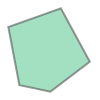

15452250236361359357313681419/20000000000000000000000000000
[Segment2D(Point2D(118233937480611/50000000000000, 53519346819749/25000000000000), Point2D(50211911549227/20000000000000, 68703853938601/50000000000000)), Segment2D(Point2D(50211911549227/20000000000000, 68703853938601/50000000000000), Point2D(145943806261029/50000000000000, 16099956157173/12500000000000)), Segment2D(Point2D(145943806261029/50000000000000, 16099956157173/12500000000000), Point2D(343922426278767/100000000000000, 42082794022781/25000000000000)), Segment2D(Point2D(152882927011023/50000000000000, 238731758371903/100000000000000), Point2D(343922426278767/100000000000000, 42082794022781/25000000000000)), Segment2D(Point2D(118233937480611/50000000000000, 53519346819749/25000000000000), Point2D(152882927011023/50000000000000, 238731758371903/100000000000000))] 

------------
Point2D(202460753330013/100000000000000, 84002713357223/50000000000000)
6 {Point2D(57986481591840074745841937227/24129948757616150000000000000, 6

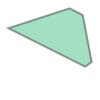

31829824859799289834378477313971973152985773575422527251/48520793200220208942993345066500000000000000000000000000
[Segment2D(Point2D(11515491740321481387910523699/10054060555123550000000000000, 38754811035296268612089476301/20108121110247100000000000000), Point2D(57986481591840074745841937227/24129948757616150000000000000, 62663262196240675254158062773/48259897515232300000000000000)), Segment2D(Point2D(57986481591840074745841937227/24129948757616150000000000000, 62663262196240675254158062773/48259897515232300000000000000), Point2D(50211911549227/20000000000000, 68703853938601/50000000000000)), Segment2D(Point2D(118233937480611/50000000000000, 53519346819749/25000000000000), Point2D(50211911549227/20000000000000, 68703853938601/50000000000000)), Segment2D(Point2D(42988601371551/20000000000000, 112670795237771/50000000000000), Point2D(118233937480611/50000000000000, 53519346819749/25000000000000)), Segment2D(Point2D(11515491740321481387910523699/10054060555123550000000000000, 38754811035

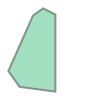

2132739823824417603423352353644152577497882982764488089203/1775433981129674932105720423470000000000000000000000000000
[Segment2D(Point2D(901782062931639/100000000000000, 631895538029299/100000000000000), Point2D(925239909134039/100000000000000, 598828541262041/100000000000000)), Segment2D(Point2D(925239909134039/100000000000000, 598828541262041/100000000000000), Point2D(10, 34978305859536554136321954149/5939771887151050000000000000)), Segment2D(Point2D(10, 34978305859536554136321954149/5939771887151050000000000000), Point2D(10, 15/2)), Segment2D(Point2D(9101097603578650993290643999/934081526435754375000000000, 14250940557315208381709356001/1868163052871508750000000000), Point2D(10, 15/2)), Segment2D(Point2D(953273677003829/100000000000000, 747842435164307/100000000000000), Point2D(9101097603578650993290643999/934081526435754375000000000, 14250940557315208381709356001/1868163052871508750000000000)), Segment2D(Point2D(901782062931639/100000000000000, 631895538029299/100000000000000), Poi

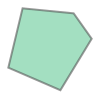

7729586841074357090691840007/10000000000000000000000000000
[Segment2D(Point2D(816766421497567/100000000000000, 35073003679859/6250000000000), Point2D(442261007373147/50000000000000, 531852992693257/100000000000000)), Segment2D(Point2D(442261007373147/50000000000000, 531852992693257/100000000000000), Point2D(925239909134039/100000000000000, 598828541262041/100000000000000)), Segment2D(Point2D(901782062931639/100000000000000, 631895538029299/100000000000000), Point2D(925239909134039/100000000000000, 598828541262041/100000000000000)), Segment2D(Point2D(417649878035929/50000000000000, 79803123894503/12500000000000), Point2D(901782062931639/100000000000000, 631895538029299/100000000000000)), Segment2D(Point2D(816766421497567/100000000000000, 35073003679859/6250000000000), Point2D(417649878035929/50000000000000, 79803123894503/12500000000000))] 

------------
Point2D(6861586223397/781250000000, 682076753663407/100000000000000)
5 {Point2D(841308351347483/100000000000000, 363410444810843/50000

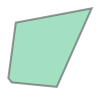

9149884179472564122421498661/10000000000000000000000000000
[Segment2D(Point2D(830267243486327/100000000000000, 644968952127171/100000000000000), Point2D(417649878035929/50000000000000, 79803123894503/12500000000000)), Segment2D(Point2D(417649878035929/50000000000000, 79803123894503/12500000000000), Point2D(901782062931639/100000000000000, 631895538029299/100000000000000)), Segment2D(Point2D(901782062931639/100000000000000, 631895538029299/100000000000000), Point2D(953273677003829/100000000000000, 747842435164307/100000000000000)), Segment2D(Point2D(841308351347483/100000000000000, 363410444810843/50000000000000), Point2D(953273677003829/100000000000000, 747842435164307/100000000000000)), Segment2D(Point2D(830267243486327/100000000000000, 644968952127171/100000000000000), Point2D(841308351347483/100000000000000, 363410444810843/50000000000000))] 

------------
Point2D(859535684173767/100000000000000, 3909646159553/500000000000)
6 {Point2D(3877620896919376502519771531/4629748445125050000

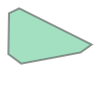

885611381948638317521638755649558320392210779108229082289/922573332189006315720317431380000000000000000000000000000
[Segment2D(Point2D(817065616420459/100000000000000, 372418382043153/50000000000000), Point2D(841308351347483/100000000000000, 363410444810843/50000000000000)), Segment2D(Point2D(841308351347483/100000000000000, 363410444810843/50000000000000), Point2D(953273677003829/100000000000000, 747842435164307/100000000000000)), Segment2D(Point2D(953273677003829/100000000000000, 747842435164307/100000000000000), Point2D(9101097603578650993290643999/934081526435754375000000000, 14250940557315208381709356001/1868163052871508750000000000)), Segment2D(Point2D(3877620896919376502519771531/462974844512505000000000000, 7696750215893248497480228469/925949689025010000000000000), Point2D(9101097603578650993290643999/934081526435754375000000000, 14250940557315208381709356001/1868163052871508750000000000)), Segment2D(Point2D(409123461789391/50000000000000, 410930640902713/50000000000000), Point

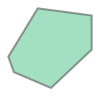

103783390431881454009525807204830800037914882986314840021/119312732253639302399487793340000000000000000000000000000
[Segment2D(Point2D(442261007373147/50000000000000, 531852992693257/100000000000000), Point2D(446075741280089/50000000000000, 510453884398493/100000000000000)), Segment2D(Point2D(446075741280089/50000000000000, 510453884398493/100000000000000), Point2D(471799948532403/50000000000000, 97687950638879/20000000000000)), Segment2D(Point2D(471799948532403/50000000000000, 97687950638879/20000000000000), Point2D(10, 6798909290433792317344864669/1255443122653175000000000000)), Segment2D(Point2D(10, 6798909290433792317344864669/1255443122653175000000000000), Point2D(10, 34978305859536554136321954149/5939771887151050000000000000)), Segment2D(Point2D(925239909134039/100000000000000, 598828541262041/100000000000000), Point2D(10, 34978305859536554136321954149/5939771887151050000000000000)), Segment2D(Point2D(442261007373147/50000000000000, 531852992693257/100000000000000), Point2D(92523

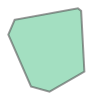

15902254606398691480167632393/20000000000000000000000000000
[Segment2D(Point2D(39561286263229/20000000000000, 734984159058277/100000000000000), Point2D(227497967216643/100000000000000, 66705157132739/10000000000000)), Segment2D(Point2D(227497967216643/100000000000000, 66705157132739/10000000000000), Point2D(125851661034257/50000000000000, 660318782779693/100000000000000)), Segment2D(Point2D(125851661034257/50000000000000, 660318782779693/100000000000000), Point2D(18582826296057/6250000000000, 27464163165903/4000000000000)), Segment2D(Point2D(293114158305309/100000000000000, 153210277142409/20000000000000), Point2D(18582826296057/6250000000000, 27464163165903/4000000000000)), Segment2D(Point2D(288869011517813/100000000000000, 769392770401339/100000000000000), Point2D(293114158305309/100000000000000, 153210277142409/20000000000000)), Segment2D(Point2D(206095018758473/100000000000000, 754386672117057/100000000000000), Point2D(288869011517813/100000000000000, 769392770401339/10000000000000

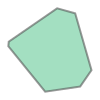

1998487819953418517284410629/2500000000000000000000000000
[Segment2D(Point2D(40505794446283/25000000000000, 616187044204171/100000000000000), Point2D(52865462412687/25000000000000, 555234802524751/100000000000000)), Segment2D(Point2D(52865462412687/25000000000000, 555234802524751/100000000000000), Point2D(64602548555989/25000000000000, 281052254123517/50000000000000)), Segment2D(Point2D(64602548555989/25000000000000, 281052254123517/50000000000000), Point2D(273583091181623/100000000000000, 584088749630233/100000000000000)), Segment2D(Point2D(125851661034257/50000000000000, 660318782779693/100000000000000), Point2D(273583091181623/100000000000000, 584088749630233/100000000000000)), Segment2D(Point2D(227497967216643/100000000000000, 66705157132739/10000000000000), Point2D(125851661034257/50000000000000, 660318782779693/100000000000000)), Segment2D(Point2D(162581336941593/100000000000000, 124463952519369/20000000000000), Point2D(227497967216643/100000000000000, 66705157132739/100000000000

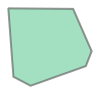

7913310444462254939520474027/10000000000000000000000000000
[Segment2D(Point2D(208578535184173/100000000000000, 310678919283053/100000000000000), Point2D(42988601371551/20000000000000, 112670795237771/50000000000000)), Segment2D(Point2D(42988601371551/20000000000000, 112670795237771/50000000000000), Point2D(118233937480611/50000000000000, 53519346819749/25000000000000)), Segment2D(Point2D(118233937480611/50000000000000, 53519346819749/25000000000000), Point2D(152882927011023/50000000000000, 238731758371903/100000000000000)), Segment2D(Point2D(152882927011023/50000000000000, 238731758371903/100000000000000), Point2D(626097587981/200000000000, 257413543506249/100000000000000)), Segment2D(Point2D(18113249510019/6250000000000, 155222771103131/50000000000000), Point2D(626097587981/200000000000, 257413543506249/100000000000000)), Segment2D(Point2D(104508909636317/50000000000000, 62227569045379/20000000000000), Point2D(18113249510019/6250000000000, 155222771103131/50000000000000)), Segment2D(P

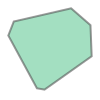

4002280614677117704490707809/5000000000000000000000000000
[Segment2D(Point2D(152882927011023/50000000000000, 238731758371903/100000000000000), Point2D(343922426278767/100000000000000, 42082794022781/25000000000000)), Segment2D(Point2D(343922426278767/100000000000000, 42082794022781/25000000000000), Point2D(35405391097157/10000000000000, 166603421308623/100000000000000)), Segment2D(Point2D(35405391097157/10000000000000, 166603421308623/100000000000000), Point2D(16676963966253/4000000000000, 52778198656949/25000000000000)), Segment2D(Point2D(415331758413799/100000000000000, 126258050134483/50000000000000), Point2D(16676963966253/4000000000000, 52778198656949/25000000000000)), Segment2D(Point2D(24342821710021/6250000000000, 274998222648253/100000000000000), Point2D(415331758413799/100000000000000, 126258050134483/50000000000000)), Segment2D(Point2D(626097587981/200000000000, 257413543506249/100000000000000), Point2D(24342821710021/6250000000000, 274998222648253/100000000000000)), Segment2

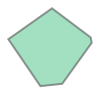

78175712094821784659314816657/100000000000000000000000000000
[Segment2D(Point2D(35405391097157/10000000000000, 166603421308623/100000000000000), Point2D(40025658774669/10000000000000, 989887301028289/1000000000000000)), Segment2D(Point2D(40025658774669/10000000000000, 989887301028289/1000000000000000), Point2D(215835038767027/50000000000000, 102363367498301/100000000000000)), Segment2D(Point2D(215835038767027/50000000000000, 102363367498301/100000000000000), Point2D(474114474485031/100000000000000, 161399643753339/100000000000000)), Segment2D(Point2D(472816031863557/100000000000000, 16909287336187/10000000000000), Point2D(474114474485031/100000000000000, 161399643753339/100000000000000)), Segment2D(Point2D(16676963966253/4000000000000, 52778198656949/25000000000000), Point2D(472816031863557/100000000000000, 16909287336187/10000000000000)), Segment2D(Point2D(35405391097157/10000000000000, 166603421308623/100000000000000), Point2D(16676963966253/4000000000000, 52778198656949/250000000000

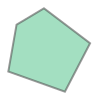

617998249068097643664236077/800000000000000000000000000
[Segment2D(Point2D(9766551598967/2500000000000, 106727705532349/12500000000000), Point2D(58338435698999/12500000000000, 82675965440803/10000000000000)), Segment2D(Point2D(58338435698999/12500000000000, 82675965440803/10000000000000), Point2D(500504703742501/100000000000000, 445911729425261/50000000000000)), Segment2D(Point2D(109633533325413/25000000000000, 938769455605021/100000000000000), Point2D(500504703742501/100000000000000, 445911729425261/50000000000000)), Segment2D(Point2D(1606833364897/400000000000, 916785760705019/100000000000000), Point2D(109633533325413/25000000000000, 938769455605021/100000000000000)), Segment2D(Point2D(9766551598967/2500000000000, 106727705532349/12500000000000), Point2D(1606833364897/400000000000, 916785760705019/100000000000000))] 

------------
Point2D(51842549621917/12500000000000, 399148248474527/50000000000000)
7 {Point2D(236478463812067/50000000000000, 40517534658489/5000000000000), Point2D(38

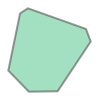

1000430477853160193880198199/1250000000000000000000000000
[Segment2D(Point2D(182520480248093/50000000000000, 772299642271087/100000000000000), Point2D(97979261664171/25000000000000, 148929588758517/20000000000000)), Segment2D(Point2D(97979261664171/25000000000000, 148929588758517/20000000000000), Point2D(429612094071401/100000000000000, 37258435310913/5000000000000)), Segment2D(Point2D(429612094071401/100000000000000, 37258435310913/5000000000000), Point2D(236478463812067/50000000000000, 40517534658489/5000000000000)), Segment2D(Point2D(58338435698999/12500000000000, 82675965440803/10000000000000), Point2D(236478463812067/50000000000000, 40517534658489/5000000000000)), Segment2D(Point2D(9766551598967/2500000000000, 106727705532349/12500000000000), Point2D(58338435698999/12500000000000, 82675965440803/10000000000000)), Segment2D(Point2D(380414230079273/100000000000000, 423572852379281/50000000000000), Point2D(9766551598967/2500000000000, 106727705532349/12500000000000)), Segment2D(Point

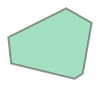

4498537038475378591645685054019419137576415931808202233/7265932261269794905028989988000000000000000000000000000
[Segment2D(Point2D(4496711190647711779818351533/1509217693962350000000000000, 27134976600082961779818351533/3018435387924700000000000000), Point2D(150725367743231/50000000000000, 866278790198639/100000000000000)), Segment2D(Point2D(150725367743231/50000000000000, 866278790198639/100000000000000), Point2D(380414230079273/100000000000000, 423572852379281/50000000000000)), Segment2D(Point2D(380414230079273/100000000000000, 423572852379281/50000000000000), Point2D(9766551598967/2500000000000, 106727705532349/12500000000000)), Segment2D(Point2D(9766551598967/2500000000000, 106727705532349/12500000000000), Point2D(1606833364897/400000000000, 916785760705019/100000000000000)), Segment2D(Point2D(2782227744473219536162011301/752245299246887500000000000, 14065907233176532036162011301/1504490598493775000000000000), Point2D(1606833364897/400000000000, 916785760705019/100000000000000)), S

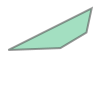

3061345799292616303342341277408127691634934318450731046699/11985021807350692346850310432885000000000000000000000000000
[Segment2D(Point2D(148546673922870360413282357241/45267544319046025000000000000, 827559838708560735413282357241/90535088638092050000000000000), Point2D(1606833364897/400000000000, 916785760705019/100000000000000)), Segment2D(Point2D(1606833364897/400000000000, 916785760705019/100000000000000), Point2D(109633533325413/25000000000000, 938769455605021/100000000000000)), Segment2D(Point2D(109633533325413/25000000000000, 938769455605021/100000000000000), Point2D(295148695964948020794650901627/66189926953404850000000000000, 1287997600266020770794650901627/132379853906809700000000000000)), Segment2D(Point2D(148546673922870360413282357241/45267544319046025000000000000, 827559838708560735413282357241/90535088638092050000000000000), Point2D(295148695964948020794650901627/66189926953404850000000000000, 1287997600266020770794650901627/132379853906809700000000000000))] 

----------

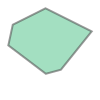

16339943237034420534388147758735082738651037794187905392493/18359602455678188036014292757620000000000000000000000000000
[Segment2D(Point2D(109633533325413/25000000000000, 938769455605021/100000000000000), Point2D(500504703742501/100000000000000, 445911729425261/50000000000000)), Segment2D(Point2D(500504703742501/100000000000000, 445911729425261/50000000000000), Point2D(525437578614311/100000000000000, 898564504969387/100000000000000)), Segment2D(Point2D(525437578614311/100000000000000, 898564504969387/100000000000000), Point2D(199818304233450242272802996769/34672198816223650000000000000, 666986666172141007727197003231/69344397632447300000000000000)), Segment2D(Point2D(5, 10), Point2D(199818304233450242272802996769/34672198816223650000000000000, 666986666172141007727197003231/69344397632447300000000000000)), Segment2D(Point2D(295148695964948020794650901627/66189926953404850000000000000, 1287997600266020770794650901627/132379853906809700000000000000), Point2D(5, 10)), Segment2D(Point2D(1

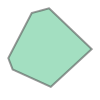

15784545519447715913886902507/20000000000000000000000000000
[Segment2D(Point2D(58338435698999/12500000000000, 82675965440803/10000000000000), Point2D(236478463812067/50000000000000, 40517534658489/5000000000000)), Segment2D(Point2D(236478463812067/50000000000000, 40517534658489/5000000000000), Point2D(527943344447147/100000000000000, 196331150391999/25000000000000)), Segment2D(Point2D(527943344447147/100000000000000, 196331150391999/25000000000000), Point2D(293454936258711/50000000000000, 33590289079287/4000000000000)), Segment2D(Point2D(525437578614311/100000000000000, 898564504969387/100000000000000), Point2D(293454936258711/50000000000000, 33590289079287/4000000000000)), Segment2D(Point2D(500504703742501/100000000000000, 445911729425261/50000000000000), Point2D(525437578614311/100000000000000, 898564504969387/100000000000000)), Segment2D(Point2D(58338435698999/12500000000000, 82675965440803/10000000000000), Point2D(500504703742501/100000000000000, 445911729425261/50000000000000))] 


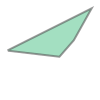

585789745559117885675784437369841933094623338563384243049/1798153788886692024101475315300500000000000000000000000000
[Segment2D(Point2D(201723090580097266653765065631/99307009908318050000000000000, 1691328239204868016653765065631/198614019816636100000000000000), Point2D(101797901856431/50000000000000, 850369527126567/100000000000000)), Segment2D(Point2D(101797901856431/50000000000000, 850369527126567/100000000000000), Point2D(55955864158943/20000000000000, 420726954843097/50000000000000)), Segment2D(Point2D(55955864158943/20000000000000, 420726954843097/50000000000000), Point2D(150725367743231/50000000000000, 866278790198639/100000000000000)), Segment2D(Point2D(150725367743231/50000000000000, 866278790198639/100000000000000), Point2D(148546673922870360413282357241/45267544319046025000000000000, 827559838708560735413282357241/90535088638092050000000000000)), Segment2D(Point2D(201723090580097266653765065631/99307009908318050000000000000, 1691328239204868016653765065631/198614019816636100

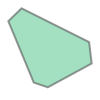

1121683617243247191126466910485543201362618643951682199/2064037562272901054683697645000000000000000000000000000
[Segment2D(Point2D(42198234374949/6250000000000, 222271404103407/25000000000000), Point2D(705660387463571/100000000000000, 163107329143603/20000000000000)), Segment2D(Point2D(705660387463571/100000000000000, 163107329143603/20000000000000), Point2D(361223057429057/50000000000000, 809873435084321/100000000000000)), Segment2D(Point2D(361223057429057/50000000000000, 809873435084321/100000000000000), Point2D(775038813972283/100000000000000, 419200034811309/50000000000000)), Segment2D(Point2D(8028468807494291359351750261/1039969631773525000000000000, 17970771986843833640648249739/2079939263547050000000000000), Point2D(775038813972283/100000000000000, 419200034811309/50000000000000)), Segment2D(Point2D(857124699349641057125099609/124044341008362500000000000, 2243983825859421442874900391/248088682016725000000000000), Point2D(8028468807494291359351750261/1039969631773525000000000000,

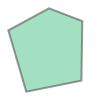

15468380857681481784572117061/20000000000000000000000000000
[Segment2D(Point2D(361223057429057/50000000000000, 809873435084321/100000000000000), Point2D(372839140411379/50000000000000, 91310125325367/12500000000000)), Segment2D(Point2D(372839140411379/50000000000000, 91310125325367/12500000000000), Point2D(817065616420459/100000000000000, 372418382043153/50000000000000)), Segment2D(Point2D(817065616420459/100000000000000, 372418382043153/50000000000000), Point2D(409123461789391/50000000000000, 410930640902713/50000000000000)), Segment2D(Point2D(775038813972283/100000000000000, 419200034811309/50000000000000), Point2D(409123461789391/50000000000000, 410930640902713/50000000000000)), Segment2D(Point2D(361223057429057/50000000000000, 809873435084321/100000000000000), Point2D(775038813972283/100000000000000, 419200034811309/50000000000000))] 

------------
Point2D(203104691667069/25000000000000, 879004636163561/100000000000000)
4 {Point2D(3877620896919376502519771531/4629748445125050000000

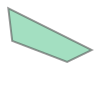

443430946203267636357055243054226934103140613264523107/3851838228544598530697523441000000000000000000000000000
[Segment2D(Point2D(8028468807494291359351750261/1039969631773525000000000000, 17970771986843833640648249739/2079939263547050000000000000), Point2D(775038813972283/100000000000000, 419200034811309/50000000000000)), Segment2D(Point2D(775038813972283/100000000000000, 419200034811309/50000000000000), Point2D(409123461789391/50000000000000, 410930640902713/50000000000000)), Segment2D(Point2D(409123461789391/50000000000000, 410930640902713/50000000000000), Point2D(3877620896919376502519771531/462974844512505000000000000, 7696750215893248497480228469/925949689025010000000000000)), Segment2D(Point2D(8028468807494291359351750261/1039969631773525000000000000, 17970771986843833640648249739/2079939263547050000000000000), Point2D(3877620896919376502519771531/462974844512505000000000000, 7696750215893248497480228469/925949689025010000000000000))] 

------------
Point2D(82065843887667/125000

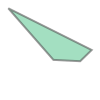

808680833587118310016115760789613171893168988252487227/3127920038886828389429323835000000000000000000000000000
[Segment2D(Point2D(199818304233450242272802996769/34672198816223650000000000000, 666986666172141007727197003231/69344397632447300000000000000), Point2D(319178855150821/50000000000000, 890937696449281/100000000000000)), Segment2D(Point2D(319178855150821/50000000000000, 890937696449281/100000000000000), Point2D(42198234374949/6250000000000, 222271404103407/25000000000000)), Segment2D(Point2D(42198234374949/6250000000000, 222271404103407/25000000000000), Point2D(857124699349641057125099609/124044341008362500000000000, 2243983825859421442874900391/248088682016725000000000000)), Segment2D(Point2D(199818304233450242272802996769/34672198816223650000000000000, 666986666172141007727197003231/69344397632447300000000000000), Point2D(857124699349641057125099609/124044341008362500000000000, 2243983825859421442874900391/248088682016725000000000000))] 

------------
Point2D(130230635819901/2

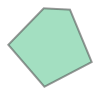

15510686096137712335873938151/20000000000000000000000000000
[Segment2D(Point2D(588626392161999/100000000000000, 839735453485173/100000000000000), Point2D(319636123267709/50000000000000, 780870109511639/100000000000000)), Segment2D(Point2D(319636123267709/50000000000000, 780870109511639/100000000000000), Point2D(705660387463571/100000000000000, 163107329143603/20000000000000)), Segment2D(Point2D(42198234374949/6250000000000, 222271404103407/25000000000000), Point2D(705660387463571/100000000000000, 163107329143603/20000000000000)), Segment2D(Point2D(319178855150821/50000000000000, 890937696449281/100000000000000), Point2D(42198234374949/6250000000000, 222271404103407/25000000000000)), Segment2D(Point2D(588626392161999/100000000000000, 839735453485173/100000000000000), Point2D(319178855150821/50000000000000, 890937696449281/100000000000000))] 

------------
Point2D(691920049656643/100000000000000, 758682613524357/100000000000000)
7 {Point2D(319636123267709/50000000000000, 780870109511639/

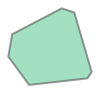

15960292010366401405339915761/20000000000000000000000000000
[Segment2D(Point2D(634150404704877/100000000000000, 375479989015301/50000000000000), Point2D(10343388140333/1562500000000, 178257250926993/25000000000000)), Segment2D(Point2D(10343388140333/1562500000000, 178257250926993/25000000000000), Point2D(740171419678331/100000000000000, 180469357894487/25000000000000)), Segment2D(Point2D(740171419678331/100000000000000, 180469357894487/25000000000000), Point2D(372839140411379/50000000000000, 91310125325367/12500000000000)), Segment2D(Point2D(361223057429057/50000000000000, 809873435084321/100000000000000), Point2D(372839140411379/50000000000000, 91310125325367/12500000000000)), Segment2D(Point2D(705660387463571/100000000000000, 163107329143603/20000000000000), Point2D(361223057429057/50000000000000, 809873435084321/100000000000000)), Segment2D(Point2D(319636123267709/50000000000000, 780870109511639/100000000000000), Point2D(705660387463571/100000000000000, 163107329143603/2000000000000

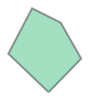

623163336986133173756907770429502300301949630801468508453/766960938880751255870367255320000000000000000000000000000
[Segment2D(Point2D(525437578614311/100000000000000, 898564504969387/100000000000000), Point2D(293454936258711/50000000000000, 33590289079287/4000000000000)), Segment2D(Point2D(293454936258711/50000000000000, 33590289079287/4000000000000), Point2D(588626392161999/100000000000000, 839735453485173/100000000000000)), Segment2D(Point2D(588626392161999/100000000000000, 839735453485173/100000000000000), Point2D(319178855150821/50000000000000, 890937696449281/100000000000000)), Segment2D(Point2D(46401157394368070317046777729/7649513225446150000000000000, 144836673241785679682953222271/15299026450892300000000000000), Point2D(319178855150821/50000000000000, 890937696449281/100000000000000)), Segment2D(Point2D(70464635273061317444369777441/12532838957802100000000000000, 242856338671991182555630222559/25065677915604200000000000000), Point2D(46401157394368070317046777729/7649513225446

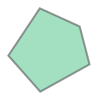

7686657077216631437695388901/10000000000000000000000000000
[Segment2D(Point2D(429612094071401/100000000000000, 37258435310913/5000000000000), Point2D(236795124825199/50000000000000, 173878282140237/25000000000000)), Segment2D(Point2D(236795124825199/50000000000000, 173878282140237/25000000000000), Point2D(541518308808761/100000000000000, 14662734104197/2000000000000)), Segment2D(Point2D(527943344447147/100000000000000, 196331150391999/25000000000000), Point2D(541518308808761/100000000000000, 14662734104197/2000000000000)), Segment2D(Point2D(236478463812067/50000000000000, 40517534658489/5000000000000), Point2D(527943344447147/100000000000000, 196331150391999/25000000000000)), Segment2D(Point2D(429612094071401/100000000000000, 37258435310913/5000000000000), Point2D(236478463812067/50000000000000, 40517534658489/5000000000000))] 

------------
Point2D(582241773918377/100000000000000, 48591502176719/6250000000000)
7 {Point2D(557396761027191/100000000000000, 724632303017131/100000000000000

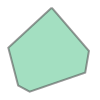

3980554884889050796836436889/5000000000000000000000000000
[Segment2D(Point2D(527943344447147/100000000000000, 196331150391999/25000000000000), Point2D(541518308808761/100000000000000, 14662734104197/2000000000000)), Segment2D(Point2D(541518308808761/100000000000000, 14662734104197/2000000000000), Point2D(557396761027191/100000000000000, 724632303017131/100000000000000)), Segment2D(Point2D(557396761027191/100000000000000, 724632303017131/100000000000000), Point2D(634150404704877/100000000000000, 375479989015301/50000000000000)), Segment2D(Point2D(634150404704877/100000000000000, 375479989015301/50000000000000), Point2D(319636123267709/50000000000000, 780870109511639/100000000000000)), Segment2D(Point2D(588626392161999/100000000000000, 839735453485173/100000000000000), Point2D(319636123267709/50000000000000, 780870109511639/100000000000000)), Segment2D(Point2D(293454936258711/50000000000000, 33590289079287/4000000000000), Point2D(588626392161999/100000000000000, 839735453485173/100000000

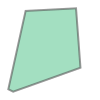

16825106495316711687349664412331643121808757541531027173/19029754486275374144975737089600000000000000000000000000
[Segment2D(Point2D(459561512817733119210036161/413018768988464062500000000, 1605532332124587193289963839/826037537976928125000000000), Point2D(1063893247057243065608951721/899898310239860000000000000, 3435598304142056934391048279/1799796620479720000000000000)), Segment2D(Point2D(1063893247057243065608951721/899898310239860000000000000, 3435598304142056934391048279/1799796620479720000000000000), Point2D(42988601371551/20000000000000, 112670795237771/50000000000000)), Segment2D(Point2D(208578535184173/100000000000000, 310678919283053/100000000000000), Point2D(42988601371551/20000000000000, 112670795237771/50000000000000)), Segment2D(Point2D(34030663987907/25000000000000, 4795749077827/1562500000000), Point2D(208578535184173/100000000000000, 310678919283053/100000000000000)), Segment2D(Point2D(459561512817733119210036161/413018768988464062500000000, 160553233212458719328996383

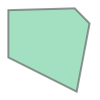

65718081762471460050649113650532303441347268440612569780627/46911463773907805441767672925980000000000000000000000000000
[Segment2D(Point2D(0, 5/2), Point2D(11515491740321481387910523699/10054060555123550000000000000, 38754811035296268612089476301/20108121110247100000000000000)), Segment2D(Point2D(11515491740321481387910523699/10054060555123550000000000000, 38754811035296268612089476301/20108121110247100000000000000), Point2D(34030663987907/25000000000000, 4795749077827/1562500000000)), Segment2D(Point2D(22247317066049/20000000000000, 332363706612969/100000000000000), Point2D(34030663987907/25000000000000, 4795749077827/1562500000000)), Segment2D(Point2D(0, 3841432723742018185346003531561/1166480535816986900000000000000), Point2D(22247317066049/20000000000000, 332363706612969/100000000000000)), Segment2D(Point2D(0, 5/2), Point2D(0, 3841432723742018185346003531561/1166480535816986900000000000000))] 

------------
Point2D(5131083462051/3125000000000, 177569376519269/50000000000000)
6 {Poi

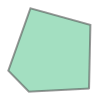

15539056719222539388804442989/20000000000000000000000000000
[Segment2D(Point2D(22247317066049/20000000000000, 332363706612969/100000000000000), Point2D(34030663987907/25000000000000, 4795749077827/1562500000000)), Segment2D(Point2D(34030663987907/25000000000000, 4795749077827/1562500000000), Point2D(208578535184173/100000000000000, 310678919283053/100000000000000)), Segment2D(Point2D(208578535184173/100000000000000, 310678919283053/100000000000000), Point2D(104508909636317/50000000000000, 62227569045379/20000000000000)), Segment2D(Point2D(104508909636317/50000000000000, 62227569045379/20000000000000), Point2D(210640816615709/100000000000000, 193884615897983/50000000000000)), Segment2D(Point2D(138025799507577/100000000000000, 101966505808253/25000000000000), Point2D(210640816615709/100000000000000, 193884615897983/50000000000000)), Segment2D(Point2D(22247317066049/20000000000000, 332363706612969/100000000000000), Point2D(138025799507577/100000000000000, 101966505808253/25000000000000))]

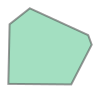

15867244228509732454364828621/20000000000000000000000000000
[Segment2D(Point2D(104508909636317/50000000000000, 62227569045379/20000000000000), Point2D(18113249510019/6250000000000, 155222771103131/50000000000000)), Segment2D(Point2D(18113249510019/6250000000000, 155222771103131/50000000000000), Point2D(316074228530537/100000000000000, 18073581380613/5000000000000)), Segment2D(Point2D(77896296477281/25000000000000, 373764998250977/100000000000000), Point2D(316074228530537/100000000000000, 18073581380613/5000000000000)), Segment2D(Point2D(236584583190193/100000000000000, 40820483858959/10000000000000), Point2D(77896296477281/25000000000000, 373764998250977/100000000000000)), Segment2D(Point2D(210640816615709/100000000000000, 193884615897983/50000000000000), Point2D(236584583190193/100000000000000, 40820483858959/10000000000000)), Segment2D(Point2D(104508909636317/50000000000000, 62227569045379/20000000000000), Point2D(210640816615709/100000000000000, 193884615897983/50000000000000))] 

-

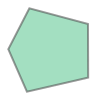

3074054252222514085573135253/4000000000000000000000000000
[Segment2D(Point2D(18113249510019/6250000000000, 155222771103131/50000000000000), Point2D(626097587981/200000000000, 257413543506249/100000000000000)), Segment2D(Point2D(626097587981/200000000000, 257413543506249/100000000000000), Point2D(24342821710021/6250000000000, 274998222648253/100000000000000)), Segment2D(Point2D(389246626660543/100000000000000, 170953643188161/50000000000000), Point2D(24342821710021/6250000000000, 274998222648253/100000000000000)), Segment2D(Point2D(316074228530537/100000000000000, 18073581380613/5000000000000), Point2D(389246626660543/100000000000000, 170953643188161/50000000000000)), Segment2D(Point2D(18113249510019/6250000000000, 155222771103131/50000000000000), Point2D(316074228530537/100000000000000, 18073581380613/5000000000000))] 

------------
Point2D(901848332633961/100000000000000, 5654716774433/1250000000000)
5 {Point2D(223973918760717/25000000000000, 198389872512649/50000000000000), Point2D(8

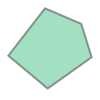

7760199450155047636166732033/10000000000000000000000000000
[Segment2D(Point2D(84022958150671/10000000000000, 221676983962887/50000000000000), Point2D(223973918760717/25000000000000, 198389872512649/50000000000000)), Segment2D(Point2D(223973918760717/25000000000000, 198389872512649/50000000000000), Point2D(479144695794407/50000000000000, 88235461527447/20000000000000)), Segment2D(Point2D(471799948532403/50000000000000, 97687950638879/20000000000000), Point2D(479144695794407/50000000000000, 88235461527447/20000000000000)), Segment2D(Point2D(446075741280089/50000000000000, 510453884398493/100000000000000), Point2D(471799948532403/50000000000000, 97687950638879/20000000000000)), Segment2D(Point2D(84022958150671/10000000000000, 221676983962887/50000000000000), Point2D(446075741280089/50000000000000, 510453884398493/100000000000000))] 

------------
Point2D(416750020461101/50000000000000, 252632617750893/50000000000000)
7 {Point2D(837222868107483/100000000000000, 443142772025537/100000000000

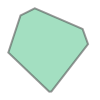

7933238669236386787132973973/10000000000000000000000000000
[Segment2D(Point2D(97412887829451/12500000000000, 498523166382069/100000000000000), Point2D(837222868107483/100000000000000, 443142772025537/100000000000000)), Segment2D(Point2D(837222868107483/100000000000000, 443142772025537/100000000000000), Point2D(84022958150671/10000000000000, 221676983962887/50000000000000)), Segment2D(Point2D(84022958150671/10000000000000, 221676983962887/50000000000000), Point2D(446075741280089/50000000000000, 510453884398493/100000000000000)), Segment2D(Point2D(442261007373147/50000000000000, 531852992693257/100000000000000), Point2D(446075741280089/50000000000000, 510453884398493/100000000000000)), Segment2D(Point2D(816766421497567/100000000000000, 35073003679859/6250000000000), Point2D(442261007373147/50000000000000, 531852992693257/100000000000000)), Segment2D(Point2D(796578674682803/100000000000000, 551071787154289/100000000000000), Point2D(816766421497567/100000000000000, 35073003679859/625000000

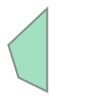

6126069324106964202611553802597472634132986327375328961/14441404320955722253875467025000000000000000000000000000
[Segment2D(Point2D(471799948532403/50000000000000, 97687950638879/20000000000000), Point2D(479144695794407/50000000000000, 88235461527447/20000000000000)), Segment2D(Point2D(479144695794407/50000000000000, 88235461527447/20000000000000), Point2D(10, 36300567020879139436901196767/8627275139177250000000000000)), Segment2D(Point2D(10, 36300567020879139436901196767/8627275139177250000000000000), Point2D(10, 6798909290433792317344864669/1255443122653175000000000000)), Segment2D(Point2D(471799948532403/50000000000000, 97687950638879/20000000000000), Point2D(10, 6798909290433792317344864669/1255443122653175000000000000))] 

------------
Point2D(38014943832977/4000000000000, 384182798409831/100000000000000)
6 {Point2D(223973918760717/25000000000000, 198389872512649/50000000000000), Point2D(10, 1128299436436038806900956538377/401164992383273500000000000000), Point2D(984177820183283/1

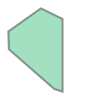

504852608704028288071674660247311934560459665259441407227/461461435399526176118326897050000000000000000000000000000
[Segment2D(Point2D(223973918760717/25000000000000, 198389872512649/50000000000000), Point2D(896869360516261/100000000000000, 90627614342413/25000000000000)), Segment2D(Point2D(896869360516261/100000000000000, 90627614342413/25000000000000), Point2D(984177820183283/100000000000000, 286192186200287/100000000000000)), Segment2D(Point2D(984177820183283/100000000000000, 286192186200287/100000000000000), Point2D(10, 1128299436436038806900956538377/401164992383273500000000000000)), Segment2D(Point2D(10, 1128299436436038806900956538377/401164992383273500000000000000), Point2D(10, 36300567020879139436901196767/8627275139177250000000000000)), Segment2D(Point2D(479144695794407/50000000000000, 88235461527447/20000000000000), Point2D(10, 36300567020879139436901196767/8627275139177250000000000000)), Segment2D(Point2D(223973918760717/25000000000000, 198389872512649/50000000000000), Poin

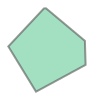

1946232663564519545909086803/2500000000000000000000000000
[Segment2D(Point2D(98291950830283/12500000000000, 194407963154709/50000000000000), Point2D(825932794355149/100000000000000, 32412440813497/10000000000000)), Segment2D(Point2D(825932794355149/100000000000000, 32412440813497/10000000000000), Point2D(896869360516261/100000000000000, 90627614342413/25000000000000)), Segment2D(Point2D(223973918760717/25000000000000, 198389872512649/50000000000000), Point2D(896869360516261/100000000000000, 90627614342413/25000000000000)), Segment2D(Point2D(84022958150671/10000000000000, 221676983962887/50000000000000), Point2D(223973918760717/25000000000000, 198389872512649/50000000000000)), Segment2D(Point2D(837222868107483/100000000000000, 443142772025537/100000000000000), Point2D(84022958150671/10000000000000, 221676983962887/50000000000000)), Segment2D(Point2D(98291950830283/12500000000000, 194407963154709/50000000000000), Point2D(837222868107483/100000000000000, 443142772025537/100000000000000))]

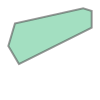

15494652488648074155971070432311170147262126705548897416041/17530474974345440653163201971300000000000000000000000000000
[Segment2D(Point2D(421982590277571/50000000000000, 107837625560993/50000000000000), Point2D(188747861541558230554081911873/21849457588757900000000000000, 79500573597768730554081911873/43698915177515800000000000000)), Segment2D(Point2D(188747861541558230554081911873/21849457588757900000000000000, 79500573597768730554081911873/43698915177515800000000000000), Point2D(10, 5/2)), Segment2D(Point2D(10, 5/2), Point2D(10, 1128299436436038806900956538377/401164992383273500000000000000)), Segment2D(Point2D(984177820183283/100000000000000, 286192186200287/100000000000000), Point2D(10, 1128299436436038806900956538377/401164992383273500000000000000)), Segment2D(Point2D(428207391931423/50000000000000, 257910672139633/100000000000000), Point2D(984177820183283/100000000000000, 286192186200287/100000000000000)), Segment2D(Point2D(421982590277571/50000000000000, 107837625560993/5000000

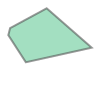

9366438064104778227452809567/10000000000000000000000000000
[Segment2D(Point2D(822479311912731/100000000000000, 310434997928829/100000000000000), Point2D(428207391931423/50000000000000, 257910672139633/100000000000000)), Segment2D(Point2D(428207391931423/50000000000000, 257910672139633/100000000000000), Point2D(984177820183283/100000000000000, 286192186200287/100000000000000)), Segment2D(Point2D(896869360516261/100000000000000, 90627614342413/25000000000000), Point2D(984177820183283/100000000000000, 286192186200287/100000000000000)), Segment2D(Point2D(825932794355149/100000000000000, 32412440813497/10000000000000), Point2D(896869360516261/100000000000000, 90627614342413/25000000000000)), Segment2D(Point2D(822479311912731/100000000000000, 310434997928829/100000000000000), Point2D(825932794355149/100000000000000, 32412440813497/10000000000000))] 

------------
Point2D(329612381648773/100000000000000, 163156332861431/20000000000000)
6 {Point2D(380414230079273/100000000000000, 4235728523792

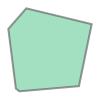

15601845428737002613770238337/20000000000000000000000000000
[Segment2D(Point2D(55955864158943/20000000000000, 420726954843097/50000000000000), Point2D(288869011517813/100000000000000, 769392770401339/100000000000000)), Segment2D(Point2D(288869011517813/100000000000000, 769392770401339/100000000000000), Point2D(293114158305309/100000000000000, 153210277142409/20000000000000)), Segment2D(Point2D(293114158305309/100000000000000, 153210277142409/20000000000000), Point2D(182520480248093/50000000000000, 772299642271087/100000000000000)), Segment2D(Point2D(182520480248093/50000000000000, 772299642271087/100000000000000), Point2D(380414230079273/100000000000000, 423572852379281/50000000000000)), Segment2D(Point2D(150725367743231/50000000000000, 866278790198639/100000000000000), Point2D(380414230079273/100000000000000, 423572852379281/50000000000000)), Segment2D(Point2D(55955864158943/20000000000000, 420726954843097/50000000000000), Point2D(150725367743231/50000000000000, 866278790198639/100000

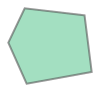

15499631418625623266991000951/20000000000000000000000000000
[Segment2D(Point2D(182767758613379/100000000000000, 806644701121989/100000000000000), Point2D(206095018758473/100000000000000, 754386672117057/100000000000000)), Segment2D(Point2D(206095018758473/100000000000000, 754386672117057/100000000000000), Point2D(288869011517813/100000000000000, 769392770401339/100000000000000)), Segment2D(Point2D(55955864158943/20000000000000, 420726954843097/50000000000000), Point2D(288869011517813/100000000000000, 769392770401339/100000000000000)), Segment2D(Point2D(101797901856431/50000000000000, 850369527126567/100000000000000), Point2D(55955864158943/20000000000000, 420726954843097/50000000000000)), Segment2D(Point2D(182767758613379/100000000000000, 806644701121989/100000000000000), Point2D(101797901856431/50000000000000, 850369527126567/100000000000000))] 

------------
Point2D(36537294257787/25000000000000, 847907451895279/100000000000000)
4 {Point2D(201723090580097266653765065631/9930700990831

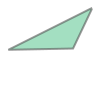

2125721454345764444729364932829336524064469894937234042211/13025841283996834931692641625930000000000000000000000000000
[Segment2D(Point2D(36228429884447133660686293017/32791847463795650000000000000, 528106141841381883660686293017/65583694927591300000000000000), Point2D(182767758613379/100000000000000, 806644701121989/100000000000000)), Segment2D(Point2D(182767758613379/100000000000000, 806644701121989/100000000000000), Point2D(101797901856431/50000000000000, 850369527126567/100000000000000)), Segment2D(Point2D(201723090580097266653765065631/99307009908318050000000000000, 1691328239204868016653765065631/198614019816636100000000000000), Point2D(101797901856431/50000000000000, 850369527126567/100000000000000)), Segment2D(Point2D(36228429884447133660686293017/32791847463795650000000000000, 528106141841381883660686293017/65583694927591300000000000000), Point2D(201723090580097266653765065631/99307009908318050000000000000, 1691328239204868016653765065631/198614019816636100000000000000))] 

--

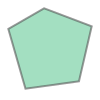

309108569333425653129205677/400000000000000000000000000
[Segment2D(Point2D(125851661034257/50000000000000, 660318782779693/100000000000000), Point2D(273583091181623/100000000000000, 584088749630233/100000000000000)), Segment2D(Point2D(273583091181623/100000000000000, 584088749630233/100000000000000), Point2D(5340821733019/1562500000000, 5934868472893/1000000000000)), Segment2D(Point2D(5340821733019/1562500000000, 5934868472893/1000000000000), Point2D(71607452996299/20000000000000, 663626256704591/100000000000000)), Segment2D(Point2D(18582826296057/6250000000000, 27464163165903/4000000000000), Point2D(71607452996299/20000000000000, 663626256704591/100000000000000)), Segment2D(Point2D(125851661034257/50000000000000, 660318782779693/100000000000000), Point2D(18582826296057/6250000000000, 27464163165903/4000000000000))] 

------------
Point2D(168820521624373/50000000000000, 361679865198079/50000000000000)
6 {Point2D(71607452996299/20000000000000, 663626256704591/100000000000000), Point2D(1

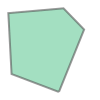

15708693658197561145819948143/20000000000000000000000000000
[Segment2D(Point2D(293114158305309/100000000000000, 153210277142409/20000000000000), Point2D(18582826296057/6250000000000, 27464163165903/4000000000000)), Segment2D(Point2D(18582826296057/6250000000000, 27464163165903/4000000000000), Point2D(71607452996299/20000000000000, 663626256704591/100000000000000)), Segment2D(Point2D(71607452996299/20000000000000, 663626256704591/100000000000000), Point2D(179759025192279/50000000000000, 41522902024779/6250000000000)), Segment2D(Point2D(179759025192279/50000000000000, 41522902024779/6250000000000), Point2D(97979261664171/25000000000000, 148929588758517/20000000000000)), Segment2D(Point2D(182520480248093/50000000000000, 772299642271087/100000000000000), Point2D(97979261664171/25000000000000, 148929588758517/20000000000000)), Segment2D(Point2D(293114158305309/100000000000000, 153210277142409/20000000000000), Point2D(182520480248093/50000000000000, 772299642271087/100000000000000))] 

-----

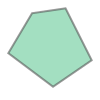

15451310076761543063169568727/20000000000000000000000000000
[Segment2D(Point2D(28499820553/16000000000, 49912647889749/10000000000000), Point2D(192688131261/80000000000, 452066821767931/100000000000000)), Segment2D(Point2D(192688131261/80000000000, 452066821767931/100000000000000), Point2D(295108930550931/100000000000000, 97849518751507/20000000000000)), Segment2D(Point2D(64602548555989/25000000000000, 281052254123517/50000000000000), Point2D(295108930550931/100000000000000, 97849518751507/20000000000000)), Segment2D(Point2D(52865462412687/25000000000000, 555234802524751/100000000000000), Point2D(64602548555989/25000000000000, 281052254123517/50000000000000)), Segment2D(Point2D(28499820553/16000000000, 49912647889749/10000000000000), Point2D(52865462412687/25000000000000, 555234802524751/100000000000000))] 

------------
Point2D(315151254932761/100000000000000, 545617337132573/100000000000000)
6 {Point2D(295108930550931/100000000000000, 97849518751507/20000000000000), Point2D(273583091

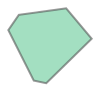

15874499405899671253523859441/20000000000000000000000000000
[Segment2D(Point2D(64602548555989/25000000000000, 281052254123517/50000000000000), Point2D(295108930550931/100000000000000, 97849518751507/20000000000000)), Segment2D(Point2D(295108930550931/100000000000000, 97849518751507/20000000000000), Point2D(313087090175449/100000000000000, 97092982734271/20000000000000)), Segment2D(Point2D(313087090175449/100000000000000, 97092982734271/20000000000000), Point2D(94660232811613/25000000000000, 549622510729671/100000000000000)), Segment2D(Point2D(5340821733019/1562500000000, 5934868472893/1000000000000), Point2D(94660232811613/25000000000000, 549622510729671/100000000000000)), Segment2D(Point2D(273583091181623/100000000000000, 584088749630233/100000000000000), Point2D(5340821733019/1562500000000, 5934868472893/1000000000000)), Segment2D(Point2D(64602548555989/25000000000000, 281052254123517/50000000000000), Point2D(273583091181623/100000000000000, 584088749630233/100000000000000))] 

-----

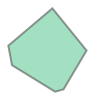

9816416480054533130264422307/12500000000000000000000000000
[Segment2D(Point2D(984478502186663/1000000000000000, 140569928434527/25000000000000), Point2D(12969750081797/12500000000000, 21359717450537/4000000000000)), Segment2D(Point2D(12969750081797/12500000000000, 21359717450537/4000000000000), Point2D(165921809795637/100000000000000, 247906942831721/50000000000000)), Segment2D(Point2D(165921809795637/100000000000000, 247906942831721/50000000000000), Point2D(28499820553/16000000000, 49912647889749/10000000000000)), Segment2D(Point2D(28499820553/16000000000, 49912647889749/10000000000000), Point2D(52865462412687/25000000000000, 555234802524751/100000000000000)), Segment2D(Point2D(40505794446283/25000000000000, 616187044204171/100000000000000), Point2D(52865462412687/25000000000000, 555234802524751/100000000000000)), Segment2D(Point2D(984478502186663/1000000000000000, 140569928434527/25000000000000), Point2D(40505794446283/25000000000000, 616187044204171/100000000000000))] 

------------

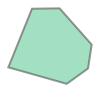

15953377388994755849452105647/20000000000000000000000000000
[Segment2D(Point2D(179759025192279/50000000000000, 41522902024779/6250000000000), Point2D(219709035457249/50000000000000, 160452127788359/25000000000000)), Segment2D(Point2D(219709035457249/50000000000000, 160452127788359/25000000000000), Point2D(468591844037859/100000000000000, 331419837391323/50000000000000)), Segment2D(Point2D(468591844037859/100000000000000, 331419837391323/50000000000000), Point2D(236795124825199/50000000000000, 173878282140237/25000000000000)), Segment2D(Point2D(429612094071401/100000000000000, 37258435310913/5000000000000), Point2D(236795124825199/50000000000000, 173878282140237/25000000000000)), Segment2D(Point2D(97979261664171/25000000000000, 148929588758517/20000000000000), Point2D(429612094071401/100000000000000, 37258435310913/5000000000000)), Segment2D(Point2D(179759025192279/50000000000000, 41522902024779/6250000000000), Point2D(97979261664171/25000000000000, 148929588758517/20000000000000))] 

-

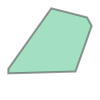

840973101549878320078603089474908131313341342707572861469057/892794546360716973809299709142610000000000000000000000000000
[Segment2D(Point2D(0, 3841432723742018185346003531561/1166480535816986900000000000000), Point2D(22247317066049/20000000000000, 332363706612969/100000000000000)), Segment2D(Point2D(22247317066049/20000000000000, 332363706612969/100000000000000), Point2D(138025799507577/100000000000000, 101966505808253/25000000000000)), Segment2D(Point2D(5215724115873/4000000000000, 84373157257301/20000000000000), Point2D(138025799507577/100000000000000, 101966505808253/25000000000000)), Segment2D(Point2D(17781497355301/25000000000000, 437000560684603/100000000000000), Point2D(5215724115873/4000000000000, 84373157257301/20000000000000)), Segment2D(Point2D(0, 2577735966568271859390230500707/765374576726576900000000000000), Point2D(17781497355301/25000000000000, 437000560684603/100000000000000)), Segment2D(Point2D(0, 3841432723742018185346003531561/1166480535816986900000000000000), Poin

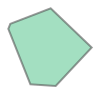

493659895944540324131317507/625000000000000000000000000
[Segment2D(Point2D(179870035391139/25000000000000, 46952632470719/10000000000000), Point2D(750653143611079/100000000000000, 391189755915957/100000000000000)), Segment2D(Point2D(750653143611079/100000000000000, 391189755915957/100000000000000), Point2D(98291950830283/12500000000000, 194407963154709/50000000000000)), Segment2D(Point2D(98291950830283/12500000000000, 194407963154709/50000000000000), Point2D(837222868107483/100000000000000, 443142772025537/100000000000000)), Segment2D(Point2D(97412887829451/12500000000000, 498523166382069/100000000000000), Point2D(837222868107483/100000000000000, 443142772025537/100000000000000)), Segment2D(Point2D(722316232304883/100000000000000, 95330887760347/20000000000000), Point2D(97412887829451/12500000000000, 498523166382069/100000000000000)), Segment2D(Point2D(179870035391139/25000000000000, 46952632470719/10000000000000), Point2D(722316232304883/100000000000000, 95330887760347/20000000000000)

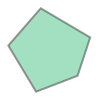

7698018610246075283427213167/10000000000000000000000000000
[Segment2D(Point2D(684242613725333/100000000000000, 539945454253237/100000000000000), Point2D(722316232304883/100000000000000, 95330887760347/20000000000000)), Segment2D(Point2D(722316232304883/100000000000000, 95330887760347/20000000000000), Point2D(97412887829451/12500000000000, 498523166382069/100000000000000)), Segment2D(Point2D(97412887829451/12500000000000, 498523166382069/100000000000000), Point2D(796578674682803/100000000000000, 551071787154289/100000000000000)), Segment2D(Point2D(728708736601651/100000000000000, 118209339403981/20000000000000), Point2D(796578674682803/100000000000000, 551071787154289/100000000000000)), Segment2D(Point2D(684242613725333/100000000000000, 539945454253237/100000000000000), Point2D(728708736601651/100000000000000, 118209339403981/20000000000000))] 

------------
Point2D(782075415272007/100000000000000, 304045027752617/50000000000000)
7 {Point2D(417649878035929/50000000000000, 79803123894503

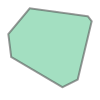

16003211271549316205430154567/20000000000000000000000000000
[Segment2D(Point2D(724882916071903/100000000000000, 621412354507977/100000000000000), Point2D(728708736601651/100000000000000, 118209339403981/20000000000000)), Segment2D(Point2D(728708736601651/100000000000000, 118209339403981/20000000000000), Point2D(796578674682803/100000000000000, 551071787154289/100000000000000)), Segment2D(Point2D(796578674682803/100000000000000, 551071787154289/100000000000000), Point2D(816766421497567/100000000000000, 35073003679859/6250000000000)), Segment2D(Point2D(816766421497567/100000000000000, 35073003679859/6250000000000), Point2D(417649878035929/50000000000000, 79803123894503/12500000000000)), Segment2D(Point2D(830267243486327/100000000000000, 644968952127171/100000000000000), Point2D(417649878035929/50000000000000, 79803123894503/12500000000000)), Segment2D(Point2D(376634933618031/50000000000000, 655541813940937/100000000000000), Point2D(830267243486327/100000000000000, 644968952127171/1000000

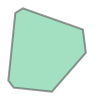

16043776069765157724894178459/20000000000000000000000000000
[Segment2D(Point2D(627028216885403/100000000000000, 554608199027427/100000000000000), Point2D(158498956084049/25000000000000, 109052449873887/20000000000000)), Segment2D(Point2D(158498956084049/25000000000000, 109052449873887/20000000000000), Point2D(684242613725333/100000000000000, 539945454253237/100000000000000)), Segment2D(Point2D(684242613725333/100000000000000, 539945454253237/100000000000000), Point2D(728708736601651/100000000000000, 118209339403981/20000000000000)), Segment2D(Point2D(724882916071903/100000000000000, 621412354507977/100000000000000), Point2D(728708736601651/100000000000000, 118209339403981/20000000000000)), Segment2D(Point2D(646054522478811/100000000000000, 40578898152379/6250000000000), Point2D(724882916071903/100000000000000, 621412354507977/100000000000000)), Segment2D(Point2D(318107472685707/50000000000000, 643260997980129/100000000000000), Point2D(646054522478811/100000000000000, 40578898152379/625

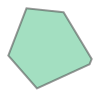

3891841904181648026150746931/5000000000000000000000000000
[Segment2D(Point2D(609425918265931/100000000000000, 120317169287137/25000000000000), Point2D(648186993579051/100000000000000, 218420898332409/50000000000000)), Segment2D(Point2D(648186993579051/100000000000000, 218420898332409/50000000000000), Point2D(179870035391139/25000000000000, 46952632470719/10000000000000)), Segment2D(Point2D(179870035391139/25000000000000, 46952632470719/10000000000000), Point2D(722316232304883/100000000000000, 95330887760347/20000000000000)), Segment2D(Point2D(684242613725333/100000000000000, 539945454253237/100000000000000), Point2D(722316232304883/100000000000000, 95330887760347/20000000000000)), Segment2D(Point2D(158498956084049/25000000000000, 109052449873887/20000000000000), Point2D(684242613725333/100000000000000, 539945454253237/100000000000000)), Segment2D(Point2D(609425918265931/100000000000000, 120317169287137/25000000000000), Point2D(158498956084049/25000000000000, 109052449873887/20000000000

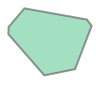

3248307588133146483106364599/4000000000000000000000000000
[Segment2D(Point2D(31926034845071/6250000000000, 66627088405637/12500000000000), Point2D(564021361452551/100000000000000, 236018128119979/50000000000000)), Segment2D(Point2D(564021361452551/100000000000000, 236018128119979/50000000000000), Point2D(609425918265931/100000000000000, 120317169287137/25000000000000)), Segment2D(Point2D(609425918265931/100000000000000, 120317169287137/25000000000000), Point2D(158498956084049/25000000000000, 109052449873887/20000000000000)), Segment2D(Point2D(627028216885403/100000000000000, 554608199027427/100000000000000), Point2D(158498956084049/25000000000000, 109052449873887/20000000000000)), Segment2D(Point2D(53453655376329/10000000000000, 114238989911251/20000000000000), Point2D(627028216885403/100000000000000, 554608199027427/100000000000000)), Segment2D(Point2D(255613037900667/50000000000000, 27186685998047/5000000000000), Point2D(53453655376329/10000000000000, 114238989911251/20000000000000))

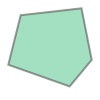

15520712116156304914180536353/20000000000000000000000000000
[Segment2D(Point2D(646054522478811/100000000000000, 40578898152379/6250000000000), Point2D(724882916071903/100000000000000, 621412354507977/100000000000000)), Segment2D(Point2D(724882916071903/100000000000000, 621412354507977/100000000000000), Point2D(376634933618031/50000000000000, 655541813940937/100000000000000)), Segment2D(Point2D(740171419678331/100000000000000, 180469357894487/25000000000000), Point2D(376634933618031/50000000000000, 655541813940937/100000000000000)), Segment2D(Point2D(10343388140333/1562500000000, 178257250926993/25000000000000), Point2D(740171419678331/100000000000000, 180469357894487/25000000000000)), Segment2D(Point2D(646054522478811/100000000000000, 40578898152379/6250000000000), Point2D(10343388140333/1562500000000, 178257250926993/25000000000000))] 

------------
Point2D(152359849293857/25000000000000, 698174212111159/100000000000000)
6 {Point2D(557396761027191/100000000000000, 724632303017131/1000

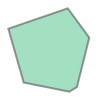

1563827708779485488773474893/2000000000000000000000000000
[Segment2D(Point2D(557396761027191/100000000000000, 724632303017131/100000000000000), Point2D(288640280194971/50000000000000, 81879975544483/12500000000000)), Segment2D(Point2D(288640280194971/50000000000000, 81879975544483/12500000000000), Point2D(318107472685707/50000000000000, 643260997980129/100000000000000)), Segment2D(Point2D(318107472685707/50000000000000, 643260997980129/100000000000000), Point2D(646054522478811/100000000000000, 40578898152379/6250000000000)), Segment2D(Point2D(646054522478811/100000000000000, 40578898152379/6250000000000), Point2D(10343388140333/1562500000000, 178257250926993/25000000000000)), Segment2D(Point2D(634150404704877/100000000000000, 375479989015301/50000000000000), Point2D(10343388140333/1562500000000, 178257250926993/25000000000000)), Segment2D(Point2D(557396761027191/100000000000000, 724632303017131/100000000000000), Point2D(634150404704877/100000000000000, 375479989015301/50000000000000))]

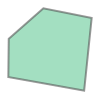

7874912623414246136336217061/10000000000000000000000000000
[Segment2D(Point2D(53453655376329/10000000000000, 114238989911251/20000000000000), Point2D(627028216885403/100000000000000, 554608199027427/100000000000000)), Segment2D(Point2D(627028216885403/100000000000000, 554608199027427/100000000000000), Point2D(318107472685707/50000000000000, 643260997980129/100000000000000)), Segment2D(Point2D(288640280194971/50000000000000, 81879975544483/12500000000000), Point2D(318107472685707/50000000000000, 643260997980129/100000000000000)), Segment2D(Point2D(267516800285483/50000000000000, 617860180620707/100000000000000), Point2D(288640280194971/50000000000000, 81879975544483/12500000000000)), Segment2D(Point2D(53453655376329/10000000000000, 114238989911251/20000000000000), Point2D(267516800285483/50000000000000, 617860180620707/100000000000000))] 

------------
Point2D(191943864486783/25000000000000, 335542394152159/100000000000000)
7 {Point2D(366892139670841/50000000000000, 286312485358249/1000

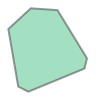

7998749446443681908842536121/10000000000000000000000000000
[Segment2D(Point2D(720505303819921/100000000000000, 363459350871309/100000000000000), Point2D(366892139670841/50000000000000, 286312485358249/100000000000000)), Segment2D(Point2D(366892139670841/50000000000000, 286312485358249/100000000000000), Point2D(93403950355843/12500000000000, 13973214638987/5000000000000)), Segment2D(Point2D(93403950355843/12500000000000, 13973214638987/5000000000000), Point2D(822479311912731/100000000000000, 310434997928829/100000000000000)), Segment2D(Point2D(822479311912731/100000000000000, 310434997928829/100000000000000), Point2D(825932794355149/100000000000000, 32412440813497/10000000000000)), Segment2D(Point2D(98291950830283/12500000000000, 194407963154709/50000000000000), Point2D(825932794355149/100000000000000, 32412440813497/10000000000000)), Segment2D(Point2D(750653143611079/100000000000000, 391189755915957/100000000000000), Point2D(98291950830283/12500000000000, 194407963154709/50000000000000

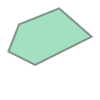

47413518287043245374698221911157644968098324242595586311347/149125524684510410639200052396900000000000000000000000000000
[Segment2D(Point2D(6283085023921329999860472689/1335127648611163750000000000, 392553219134488750139527311/2670255297222327500000000000), Point2D(5, 0)), Segment2D(Point2D(5, 0), Point2D(784684609730999117440742173731/139617291312589900000000000000, 86598153168049617440742173731/279234582625179800000000000000)), Segment2D(Point2D(263143380899997/50000000000000, 124271511386569/200000000000000), Point2D(784684609730999117440742173731/139617291312589900000000000000, 86598153168049617440742173731/279234582625179800000000000000)), Segment2D(Point2D(482314576184641/100000000000000, 27846753900719/62500000000000), Point2D(263143380899997/50000000000000, 124271511386569/200000000000000)), Segment2D(Point2D(6283085023921329999860472689/1335127648611163750000000000, 392553219134488750139527311/2670255297222327500000000000), Point2D(482314576184641/100000000000000, 278467539007

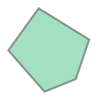

15482236222651928633725487387/20000000000000000000000000000
[Segment2D(Point2D(215835038767027/50000000000000, 102363367498301/100000000000000), Point2D(482314576184641/100000000000000, 27846753900719/62500000000000)), Segment2D(Point2D(482314576184641/100000000000000, 27846753900719/62500000000000), Point2D(263143380899997/50000000000000, 124271511386569/200000000000000)), Segment2D(Point2D(263143380899997/50000000000000, 124271511386569/200000000000000), Point2D(545078242312513/100000000000000, 29388613321903/25000000000000)), Segment2D(Point2D(474114474485031/100000000000000, 161399643753339/100000000000000), Point2D(545078242312513/100000000000000, 29388613321903/25000000000000)), Segment2D(Point2D(215835038767027/50000000000000, 102363367498301/100000000000000), Point2D(474114474485031/100000000000000, 161399643753339/100000000000000))] 

------------
Point2D(266809801081239/50000000000000, 87889141055853/50000000000000)
7 {Point2D(474114474485031/100000000000000, 161399643753339/

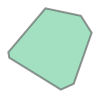

7966823694789866697636375827/10000000000000000000000000000
[Segment2D(Point2D(472816031863557/100000000000000, 16909287336187/10000000000000), Point2D(474114474485031/100000000000000, 161399643753339/100000000000000)), Segment2D(Point2D(474114474485031/100000000000000, 161399643753339/100000000000000), Point2D(545078242312513/100000000000000, 29388613321903/25000000000000)), Segment2D(Point2D(545078242312513/100000000000000, 29388613321903/25000000000000), Point2D(281407356628853/50000000000000, 125493122468713/100000000000000)), Segment2D(Point2D(281407356628853/50000000000000, 125493122468713/100000000000000), Point2D(587560066247083/100000000000000, 4893904108969/2500000000000)), Segment2D(Point2D(572726779342771/100000000000000, 219166134009801/100000000000000), Point2D(587560066247083/100000000000000, 4893904108969/2500000000000)), Segment2D(Point2D(523899462600749/100000000000000, 229453194550161/100000000000000), Point2D(572726779342771/100000000000000, 219166134009801/100000000

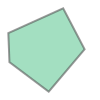

7803757204164675616883662987/10000000000000000000000000000
[Segment2D(Point2D(415331758413799/100000000000000, 126258050134483/50000000000000), Point2D(16676963966253/4000000000000, 52778198656949/25000000000000)), Segment2D(Point2D(16676963966253/4000000000000, 52778198656949/25000000000000), Point2D(472816031863557/100000000000000, 16909287336187/10000000000000)), Segment2D(Point2D(472816031863557/100000000000000, 16909287336187/10000000000000), Point2D(523899462600749/100000000000000, 229453194550161/100000000000000)), Segment2D(Point2D(493412697266799/100000000000000, 143888645362537/50000000000000), Point2D(523899462600749/100000000000000, 229453194550161/100000000000000)), Segment2D(Point2D(415331758413799/100000000000000, 126258050134483/50000000000000), Point2D(493412697266799/100000000000000, 143888645362537/50000000000000))] 

------------
Point2D(434285488537113/100000000000000, 61564806240533/20000000000000)
7 {Point2D(446832259430441/100000000000000, 363331743049093/100000

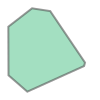

2005346236404355871949791443/2500000000000000000000000000
[Segment2D(Point2D(389246626660543/100000000000000, 170953643188161/50000000000000), Point2D(24342821710021/6250000000000, 274998222648253/100000000000000)), Segment2D(Point2D(24342821710021/6250000000000, 274998222648253/100000000000000), Point2D(415331758413799/100000000000000, 126258050134483/50000000000000)), Segment2D(Point2D(415331758413799/100000000000000, 126258050134483/50000000000000), Point2D(493412697266799/100000000000000, 143888645362537/50000000000000)), Segment2D(Point2D(493412697266799/100000000000000, 143888645362537/50000000000000), Point2D(247354173195631/50000000000000, 29246956090449/10000000000000)), Segment2D(Point2D(446832259430441/100000000000000, 363331743049093/100000000000000), Point2D(247354173195631/50000000000000, 29246956090449/10000000000000)), Segment2D(Point2D(105471759817163/25000000000000, 73428725907757/20000000000000), Point2D(446832259430441/100000000000000, 363331743049093/10000000000000

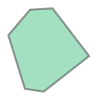

14900964283603449602012877541/20000000000000000000000000000
[Segment2D(Point2D(199912064037617/50000000000000, 43834619831379/10000000000000), Point2D(105471759817163/25000000000000, 73428725907757/20000000000000)), Segment2D(Point2D(105471759817163/25000000000000, 73428725907757/20000000000000), Point2D(446832259430441/100000000000000, 363331743049093/100000000000000)), Segment2D(Point2D(446832259430441/100000000000000, 363331743049093/100000000000000), Point2D(507269947577339/100000000000000, 82141657801711/20000000000000)), Segment2D(Point2D(458662391910367/100000000000000, 474191826587809/100000000000000), Point2D(507269947577339/100000000000000, 82141657801711/20000000000000)), Segment2D(Point2D(214333320567431/50000000000000, 14762872111969/3125000000000), Point2D(458662391910367/100000000000000, 474191826587809/100000000000000)), Segment2D(Point2D(199912064037617/50000000000000, 43834619831379/10000000000000), Point2D(214333320567431/50000000000000, 14762872111969/3125000000000)

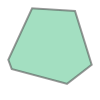

3873810993766580822884074349/5000000000000000000000000000
[Segment2D(Point2D(77896296477281/25000000000000, 373764998250977/100000000000000), Point2D(316074228530537/100000000000000, 18073581380613/5000000000000)), Segment2D(Point2D(316074228530537/100000000000000, 18073581380613/5000000000000), Point2D(389246626660543/100000000000000, 170953643188161/50000000000000)), Segment2D(Point2D(389246626660543/100000000000000, 170953643188161/50000000000000), Point2D(105471759817163/25000000000000, 73428725907757/20000000000000)), Segment2D(Point2D(199912064037617/50000000000000, 43834619831379/10000000000000), Point2D(105471759817163/25000000000000, 73428725907757/20000000000000)), Segment2D(Point2D(17151581991451/5000000000000, 441841009259333/100000000000000), Point2D(199912064037617/50000000000000, 43834619831379/10000000000000)), Segment2D(Point2D(77896296477281/25000000000000, 373764998250977/100000000000000), Point2D(17151581991451/5000000000000, 441841009259333/100000000000000))] 

---

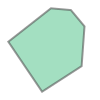

16125959740982044433833407169/20000000000000000000000000000
[Segment2D(Point2D(446832259430441/100000000000000, 363331743049093/100000000000000), Point2D(247354173195631/50000000000000, 29246956090449/10000000000000)), Segment2D(Point2D(247354173195631/50000000000000, 29246956090449/10000000000000), Point2D(17212493537121/3125000000000, 65741844592031/20000000000000)), Segment2D(Point2D(17212493537121/3125000000000, 65741844592031/20000000000000), Point2D(110980897217057/20000000000000, 385062335148241/100000000000000)), Segment2D(Point2D(133889904419679/25000000000000, 408250359551027/100000000000000), Point2D(110980897217057/20000000000000, 385062335148241/100000000000000)), Segment2D(Point2D(507269947577339/100000000000000, 82141657801711/20000000000000), Point2D(133889904419679/25000000000000, 408250359551027/100000000000000)), Segment2D(Point2D(446832259430441/100000000000000, 363331743049093/100000000000000), Point2D(507269947577339/100000000000000, 82141657801711/20000000000000)

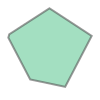

3885951083780235742701342741/5000000000000000000000000000
[Segment2D(Point2D(493412697266799/100000000000000, 143888645362537/50000000000000), Point2D(523899462600749/100000000000000, 229453194550161/100000000000000)), Segment2D(Point2D(523899462600749/100000000000000, 229453194550161/100000000000000), Point2D(572726779342771/100000000000000, 219166134009801/100000000000000)), Segment2D(Point2D(572726779342771/100000000000000, 219166134009801/100000000000000), Point2D(24388661524531/4000000000000, 58039702518293/20000000000000)), Segment2D(Point2D(17212493537121/3125000000000, 65741844592031/20000000000000), Point2D(24388661524531/4000000000000, 58039702518293/20000000000000)), Segment2D(Point2D(247354173195631/50000000000000, 29246956090449/10000000000000), Point2D(17212493537121/3125000000000, 65741844592031/20000000000000)), Segment2D(Point2D(493412697266799/100000000000000, 143888645362537/50000000000000), Point2D(247354173195631/50000000000000, 29246956090449/10000000000000))] 

-

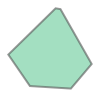

15421419549043052999580269931/20000000000000000000000000000
[Segment2D(Point2D(313087090175449/100000000000000, 97092982734271/20000000000000), Point2D(17151581991451/5000000000000, 441841009259333/100000000000000)), Segment2D(Point2D(17151581991451/5000000000000, 441841009259333/100000000000000), Point2D(199912064037617/50000000000000, 43834619831379/10000000000000)), Segment2D(Point2D(199912064037617/50000000000000, 43834619831379/10000000000000), Point2D(214333320567431/50000000000000, 14762872111969/3125000000000)), Segment2D(Point2D(385352961744291/100000000000000, 548534235578543/100000000000000), Point2D(214333320567431/50000000000000, 14762872111969/3125000000000)), Segment2D(Point2D(94660232811613/25000000000000, 549622510729671/100000000000000), Point2D(385352961744291/100000000000000, 548534235578543/100000000000000)), Segment2D(Point2D(313087090175449/100000000000000, 97092982734271/20000000000000), Point2D(94660232811613/25000000000000, 549622510729671/100000000000000))] 


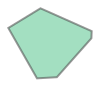

3966583541346086417546487483/5000000000000000000000000000
[Segment2D(Point2D(385352961744291/100000000000000, 548534235578543/100000000000000), Point2D(214333320567431/50000000000000, 14762872111969/3125000000000)), Segment2D(Point2D(214333320567431/50000000000000, 14762872111969/3125000000000), Point2D(458662391910367/100000000000000, 474191826587809/100000000000000)), Segment2D(Point2D(458662391910367/100000000000000, 474191826587809/100000000000000), Point2D(31926034845071/6250000000000, 66627088405637/12500000000000)), Segment2D(Point2D(31926034845071/6250000000000, 66627088405637/12500000000000), Point2D(255613037900667/50000000000000, 27186685998047/5000000000000)), Segment2D(Point2D(108478856900513/25000000000000, 144546050520889/25000000000000), Point2D(255613037900667/50000000000000, 27186685998047/5000000000000)), Segment2D(Point2D(385352961744291/100000000000000, 548534235578543/100000000000000), Point2D(108478856900513/25000000000000, 144546050520889/25000000000000))] 

---

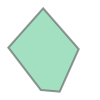

7384186405925682159356706829/10000000000000000000000000000
[Segment2D(Point2D(458662391910367/100000000000000, 474191826587809/100000000000000), Point2D(507269947577339/100000000000000, 82141657801711/20000000000000)), Segment2D(Point2D(507269947577339/100000000000000, 82141657801711/20000000000000), Point2D(133889904419679/25000000000000, 408250359551027/100000000000000)), Segment2D(Point2D(133889904419679/25000000000000, 408250359551027/100000000000000), Point2D(564021361452551/100000000000000, 236018128119979/50000000000000)), Segment2D(Point2D(31926034845071/6250000000000, 66627088405637/12500000000000), Point2D(564021361452551/100000000000000, 236018128119979/50000000000000)), Segment2D(Point2D(458662391910367/100000000000000, 474191826587809/100000000000000), Point2D(31926034845071/6250000000000, 66627088405637/12500000000000))] 

------------
Point2D(3634208521053/1250000000000, 214790400430149/50000000000000)
6 {Point2D(295108930550931/100000000000000, 97849518751507/2000000000

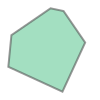

7869238235861121673460060637/10000000000000000000000000000
[Segment2D(Point2D(236584583190193/100000000000000, 40820483858959/10000000000000), Point2D(77896296477281/25000000000000, 373764998250977/100000000000000)), Segment2D(Point2D(77896296477281/25000000000000, 373764998250977/100000000000000), Point2D(17151581991451/5000000000000, 441841009259333/100000000000000)), Segment2D(Point2D(313087090175449/100000000000000, 97092982734271/20000000000000), Point2D(17151581991451/5000000000000, 441841009259333/100000000000000)), Segment2D(Point2D(295108930550931/100000000000000, 97849518751507/20000000000000), Point2D(313087090175449/100000000000000, 97092982734271/20000000000000)), Segment2D(Point2D(192688131261/80000000000, 452066821767931/100000000000000), Point2D(295108930550931/100000000000000, 97849518751507/20000000000000)), Segment2D(Point2D(236584583190193/100000000000000, 40820483858959/10000000000000), Point2D(192688131261/80000000000, 452066821767931/100000000000000))] 

--------

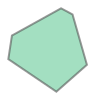

485848284670698859854120589/625000000000000000000000000
[Segment2D(Point2D(468591844037859/100000000000000, 331419837391323/50000000000000), Point2D(267516800285483/50000000000000, 617860180620707/100000000000000)), Segment2D(Point2D(267516800285483/50000000000000, 617860180620707/100000000000000), Point2D(288640280194971/50000000000000, 81879975544483/12500000000000)), Segment2D(Point2D(557396761027191/100000000000000, 724632303017131/100000000000000), Point2D(288640280194971/50000000000000, 81879975544483/12500000000000)), Segment2D(Point2D(541518308808761/100000000000000, 14662734104197/2000000000000), Point2D(557396761027191/100000000000000, 724632303017131/100000000000000)), Segment2D(Point2D(236795124825199/50000000000000, 173878282140237/25000000000000), Point2D(541518308808761/100000000000000, 14662734104197/2000000000000)), Segment2D(Point2D(468591844037859/100000000000000, 331419837391323/50000000000000), Point2D(236795124825199/50000000000000, 173878282140237/25000000000000)

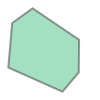

16549904895534811839494476201/20000000000000000000000000000
[Segment2D(Point2D(108478856900513/25000000000000, 144546050520889/25000000000000), Point2D(255613037900667/50000000000000, 27186685998047/5000000000000)), Segment2D(Point2D(255613037900667/50000000000000, 27186685998047/5000000000000), Point2D(53453655376329/10000000000000, 114238989911251/20000000000000)), Segment2D(Point2D(53453655376329/10000000000000, 114238989911251/20000000000000), Point2D(267516800285483/50000000000000, 617860180620707/100000000000000)), Segment2D(Point2D(468591844037859/100000000000000, 331419837391323/50000000000000), Point2D(267516800285483/50000000000000, 617860180620707/100000000000000)), Segment2D(Point2D(219709035457249/50000000000000, 160452127788359/25000000000000), Point2D(468591844037859/100000000000000, 331419837391323/50000000000000)), Segment2D(Point2D(108478856900513/25000000000000, 144546050520889/25000000000000), Point2D(219709035457249/50000000000000, 160452127788359/25000000000000))]

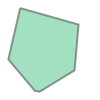

15827034921129017174159748581/20000000000000000000000000000
[Segment2D(Point2D(5340821733019/1562500000000, 5934868472893/1000000000000), Point2D(94660232811613/25000000000000, 549622510729671/100000000000000)), Segment2D(Point2D(94660232811613/25000000000000, 549622510729671/100000000000000), Point2D(385352961744291/100000000000000, 548534235578543/100000000000000)), Segment2D(Point2D(385352961744291/100000000000000, 548534235578543/100000000000000), Point2D(108478856900513/25000000000000, 144546050520889/25000000000000)), Segment2D(Point2D(108478856900513/25000000000000, 144546050520889/25000000000000), Point2D(219709035457249/50000000000000, 160452127788359/25000000000000)), Segment2D(Point2D(179759025192279/50000000000000, 41522902024779/6250000000000), Point2D(219709035457249/50000000000000, 160452127788359/25000000000000)), Segment2D(Point2D(71607452996299/20000000000000, 663626256704591/100000000000000), Point2D(179759025192279/50000000000000, 41522902024779/6250000000000)), Seg

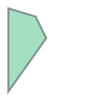

996843943951073579947048973029353982462823793607893932057/1549903935620265814591660066020000000000000000000000000000
[Segment2D(Point2D(0, 2577735966568271859390230500707/765374576726576900000000000000), Point2D(17781497355301/25000000000000, 437000560684603/100000000000000)), Segment2D(Point2D(102213702773103/200000000000000, 119369494361911/25000000000000), Point2D(17781497355301/25000000000000, 437000560684603/100000000000000)), Segment2D(Point2D(0, 2994427300660452701506061011/607508003041740000000000000), Point2D(102213702773103/200000000000000, 119369494361911/25000000000000)), Segment2D(Point2D(0, 2577735966568271859390230500707/765374576726576900000000000000), Point2D(0, 2994427300660452701506061011/607508003041740000000000000))] 

------------
Point2D(27132431769393/25000000000000, 238808201462233/50000000000000)
5 {Point2D(165921809795637/100000000000000, 247906942831721/50000000000000), Point2D(5215724115873/4000000000000, 84373157257301/20000000000000), Point2D(102213702773

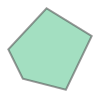

7729123682930804186592274239/10000000000000000000000000000
[Segment2D(Point2D(102213702773103/200000000000000, 119369494361911/25000000000000), Point2D(17781497355301/25000000000000, 437000560684603/100000000000000)), Segment2D(Point2D(17781497355301/25000000000000, 437000560684603/100000000000000), Point2D(5215724115873/4000000000000, 84373157257301/20000000000000)), Segment2D(Point2D(5215724115873/4000000000000, 84373157257301/20000000000000), Point2D(165921809795637/100000000000000, 247906942831721/50000000000000)), Segment2D(Point2D(12969750081797/12500000000000, 21359717450537/4000000000000), Point2D(165921809795637/100000000000000, 247906942831721/50000000000000)), Segment2D(Point2D(102213702773103/200000000000000, 119369494361911/25000000000000), Point2D(12969750081797/12500000000000, 21359717450537/4000000000000))] 

------------
Point2D(793799712064173/100000000000000, 346736406268541/50000000000000)
6 {Point2D(817065616420459/100000000000000, 372418382043153/50000000000000), 

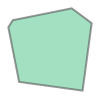

15669897024543894863179744671/20000000000000000000000000000
[Segment2D(Point2D(740171419678331/100000000000000, 180469357894487/25000000000000), Point2D(376634933618031/50000000000000, 655541813940937/100000000000000)), Segment2D(Point2D(376634933618031/50000000000000, 655541813940937/100000000000000), Point2D(830267243486327/100000000000000, 644968952127171/100000000000000)), Segment2D(Point2D(830267243486327/100000000000000, 644968952127171/100000000000000), Point2D(841308351347483/100000000000000, 363410444810843/50000000000000)), Segment2D(Point2D(817065616420459/100000000000000, 372418382043153/50000000000000), Point2D(841308351347483/100000000000000, 363410444810843/50000000000000)), Segment2D(Point2D(372839140411379/50000000000000, 91310125325367/12500000000000), Point2D(817065616420459/100000000000000, 372418382043153/50000000000000)), Segment2D(Point2D(740171419678331/100000000000000, 180469357894487/25000000000000), Point2D(372839140411379/50000000000000, 91310125325367/12500

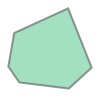

1980541748888328514151789673/2500000000000000000000000000
[Segment2D(Point2D(160125989101367/25000000000000, 392515417450937/100000000000000), Point2D(327522323422899/50000000000000, 371566437132469/100000000000000)), Segment2D(Point2D(327522323422899/50000000000000, 371566437132469/100000000000000), Point2D(720505303819921/100000000000000, 363459350871309/100000000000000)), Segment2D(Point2D(720505303819921/100000000000000, 363459350871309/100000000000000), Point2D(750653143611079/100000000000000, 391189755915957/100000000000000)), Segment2D(Point2D(179870035391139/25000000000000, 46952632470719/10000000000000), Point2D(750653143611079/100000000000000, 391189755915957/100000000000000)), Segment2D(Point2D(648186993579051/100000000000000, 218420898332409/50000000000000), Point2D(179870035391139/25000000000000, 46952632470719/10000000000000)), Segment2D(Point2D(160125989101367/25000000000000, 392515417450937/100000000000000), Point2D(648186993579051/100000000000000, 218420898332409/50000

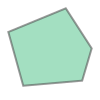

15452033848203100072543309017/20000000000000000000000000000
[Segment2D(Point2D(93403950355843/12500000000000, 13973214638987/5000000000000), Point2D(766775702801123/100000000000000, 209006225488027/100000000000000)), Segment2D(Point2D(766775702801123/100000000000000, 209006225488027/100000000000000), Point2D(421982590277571/50000000000000, 107837625560993/50000000000000)), Segment2D(Point2D(421982590277571/50000000000000, 107837625560993/50000000000000), Point2D(428207391931423/50000000000000, 257910672139633/100000000000000)), Segment2D(Point2D(822479311912731/100000000000000, 310434997928829/100000000000000), Point2D(428207391931423/50000000000000, 257910672139633/100000000000000)), Segment2D(Point2D(93403950355843/12500000000000, 13973214638987/5000000000000), Point2D(822479311912731/100000000000000, 310434997928829/100000000000000))] 

------------
Point2D(93790025298611/50000000000000, 219818154400511/50000000000000)
7 {Point2D(236584583190193/100000000000000, 40820483858959/10000

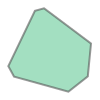

15981751948290979849099520599/20000000000000000000000000000
[Segment2D(Point2D(5215724115873/4000000000000, 84373157257301/20000000000000), Point2D(138025799507577/100000000000000, 101966505808253/25000000000000)), Segment2D(Point2D(138025799507577/100000000000000, 101966505808253/25000000000000), Point2D(210640816615709/100000000000000, 193884615897983/50000000000000)), Segment2D(Point2D(210640816615709/100000000000000, 193884615897983/50000000000000), Point2D(236584583190193/100000000000000, 40820483858959/10000000000000)), Segment2D(Point2D(236584583190193/100000000000000, 40820483858959/10000000000000), Point2D(192688131261/80000000000, 452066821767931/100000000000000)), Segment2D(Point2D(28499820553/16000000000, 49912647889749/10000000000000), Point2D(192688131261/80000000000, 452066821767931/100000000000000)), Segment2D(Point2D(165921809795637/100000000000000, 247906942831721/50000000000000), Point2D(28499820553/16000000000, 49912647889749/10000000000000)), Segment2D(Point2D(5215

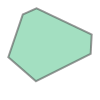

228580294288158549377287360004041662407902681627200911843/358703158318930101998009043880000000000000000000000000000
[Segment2D(Point2D(263143380899997/50000000000000, 124271511386569/200000000000000), Point2D(784684609730999117440742173731/139617291312589900000000000000, 86598153168049617440742173731/279234582625179800000000000000)), Segment2D(Point2D(784684609730999117440742173731/139617291312589900000000000000, 86598153168049617440742173731/279234582625179800000000000000), Point2D(727771220401251149967417780337/114971191489693700000000000000, 152915262952782649967417780337/229942382979387400000000000000)), Segment2D(Point2D(727771220401251149967417780337/114971191489693700000000000000, 152915262952782649967417780337/229942382979387400000000000000), Point2D(634311244101543/100000000000000, 228754742552907/250000000000000)), Segment2D(Point2D(281407356628853/50000000000000, 125493122468713/100000000000000), Point2D(634311244101543/100000000000000, 228754742552907/250000000000000)), Seg

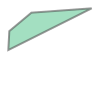

8037898260138592117615001209737548940461359826115007642711/35971161630548273422169552060600000000000000000000000000000
[Segment2D(Point2D(727771220401251149967417780337/114971191489693700000000000000, 152915262952782649967417780337/229942382979387400000000000000), Point2D(284918817447053768457221556741/38326708131377155000000000000, 93285276790167993457221556741/76653416262754310000000000000)), Segment2D(Point2D(132712763250207/20000000000000, 115930356874141/100000000000000), Point2D(284918817447053768457221556741/38326708131377155000000000000, 93285276790167993457221556741/76653416262754310000000000000)), Segment2D(Point2D(634311244101543/100000000000000, 228754742552907/250000000000000), Point2D(132712763250207/20000000000000, 115930356874141/100000000000000)), Segment2D(Point2D(727771220401251149967417780337/114971191489693700000000000000, 152915262952782649967417780337/229942382979387400000000000000), Point2D(634311244101543/100000000000000, 228754742552907/250000000000000))] 

--

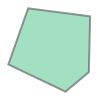

77440330920188155229646971289/100000000000000000000000000000
[Segment2D(Point2D(281407356628853/50000000000000, 125493122468713/100000000000000), Point2D(634311244101543/100000000000000, 228754742552907/250000000000000)), Segment2D(Point2D(634311244101543/100000000000000, 228754742552907/250000000000000), Point2D(132712763250207/20000000000000, 115930356874141/100000000000000)), Segment2D(Point2D(132712763250207/20000000000000, 115930356874141/100000000000000), Point2D(166288038300471/25000000000000, 297163535283/160000000000)), Segment2D(Point2D(587560066247083/100000000000000, 4893904108969/2500000000000), Point2D(166288038300471/25000000000000, 297163535283/160000000000)), Segment2D(Point2D(281407356628853/50000000000000, 125493122468713/100000000000000), Point2D(587560066247083/100000000000000, 4893904108969/2500000000000))] 

------------
Point2D(711387510992603/100000000000000, 36059949897293/25000000000000)
6 {Point2D(132712763250207/20000000000000, 115930356874141/1000000000000

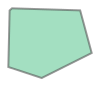

2127906708841116003444548784496246264747740757385090101231/3022471339695322092252815181615000000000000000000000000000
[Segment2D(Point2D(132712763250207/20000000000000, 115930356874141/100000000000000), Point2D(34497942490160503208385728627/4894996441349070000000000000, 10022960283415153208385728627/9789992882698140000000000000)), Segment2D(Point2D(34497942490160503208385728627/4894996441349070000000000000, 10022960283415153208385728627/9789992882698140000000000000), Point2D(473271845639660628715253198569/61746139673644450000000000000, 164541147271438378715253198569/123492279347288900000000000000)), Segment2D(Point2D(188062175512443/25000000000000, 185865150293817/100000000000000), Point2D(473271845639660628715253198569/61746139673644450000000000000, 164541147271438378715253198569/123492279347288900000000000000)), Segment2D(Point2D(668108568135311/100000000000000, 188392630108553/100000000000000), Point2D(188062175512443/25000000000000, 185865150293817/100000000000000)), Segment2D(Poin

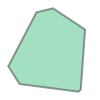

15961596736211192858926649837/20000000000000000000000000000
[Segment2D(Point2D(572726779342771/100000000000000, 219166134009801/100000000000000), Point2D(587560066247083/100000000000000, 4893904108969/2500000000000)), Segment2D(Point2D(587560066247083/100000000000000, 4893904108969/2500000000000), Point2D(166288038300471/25000000000000, 297163535283/160000000000)), Segment2D(Point2D(166288038300471/25000000000000, 297163535283/160000000000), Point2D(668108568135311/100000000000000, 188392630108553/100000000000000)), Segment2D(Point2D(668108568135311/100000000000000, 188392630108553/100000000000000), Point2D(336897549168283/50000000000000, 267510853772841/100000000000000)), Segment2D(Point2D(315808164200431/50000000000000, 295497760372717/100000000000000), Point2D(336897549168283/50000000000000, 267510853772841/100000000000000)), Segment2D(Point2D(24388661524531/4000000000000, 58039702518293/20000000000000), Point2D(315808164200431/50000000000000, 295497760372717/100000000000000)), Segm

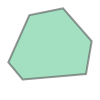

3911768397560217047379662111/5000000000000000000000000000
[Segment2D(Point2D(133889904419679/25000000000000, 408250359551027/100000000000000), Point2D(110980897217057/20000000000000, 385062335148241/100000000000000)), Segment2D(Point2D(110980897217057/20000000000000, 385062335148241/100000000000000), Point2D(160125989101367/25000000000000, 392515417450937/100000000000000)), Segment2D(Point2D(160125989101367/25000000000000, 392515417450937/100000000000000), Point2D(648186993579051/100000000000000, 218420898332409/50000000000000)), Segment2D(Point2D(609425918265931/100000000000000, 120317169287137/25000000000000), Point2D(648186993579051/100000000000000, 218420898332409/50000000000000)), Segment2D(Point2D(564021361452551/100000000000000, 236018128119979/50000000000000), Point2D(609425918265931/100000000000000, 120317169287137/25000000000000)), Segment2D(Point2D(133889904419679/25000000000000, 408250359551027/100000000000000), Point2D(564021361452551/100000000000000, 236018128119979/50000

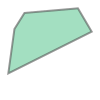

5264817908480133938052235017140285469426054682768849699603/8374177838332276922973728857745000000000000000000000000000
[Segment2D(Point2D(284918817447053768457221556741/38326708131377155000000000000, 93285276790167993457221556741/76653416262754310000000000000), Point2D(188747861541558230554081911873/21849457588757900000000000000, 79500573597768730554081911873/43698915177515800000000000000)), Segment2D(Point2D(421982590277571/50000000000000, 107837625560993/50000000000000), Point2D(188747861541558230554081911873/21849457588757900000000000000, 79500573597768730554081911873/43698915177515800000000000000)), Segment2D(Point2D(766775702801123/100000000000000, 209006225488027/100000000000000), Point2D(421982590277571/50000000000000, 107837625560993/50000000000000)), Segment2D(Point2D(188062175512443/25000000000000, 185865150293817/100000000000000), Point2D(766775702801123/100000000000000, 209006225488027/100000000000000)), Segment2D(Point2D(284918817447053768457221556741/3832670813137715500000

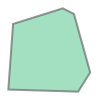

15744420932753199003030864107/20000000000000000000000000000
[Segment2D(Point2D(668108568135311/100000000000000, 188392630108553/100000000000000), Point2D(188062175512443/25000000000000, 185865150293817/100000000000000)), Segment2D(Point2D(188062175512443/25000000000000, 185865150293817/100000000000000), Point2D(766775702801123/100000000000000, 209006225488027/100000000000000)), Segment2D(Point2D(93403950355843/12500000000000, 13973214638987/5000000000000), Point2D(766775702801123/100000000000000, 209006225488027/100000000000000)), Segment2D(Point2D(366892139670841/50000000000000, 286312485358249/100000000000000), Point2D(93403950355843/12500000000000, 13973214638987/5000000000000)), Segment2D(Point2D(336897549168283/50000000000000, 267510853772841/100000000000000), Point2D(366892139670841/50000000000000, 286312485358249/100000000000000)), Segment2D(Point2D(668108568135311/100000000000000, 188392630108553/100000000000000), Point2D(336897549168283/50000000000000, 267510853772841/10000000

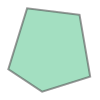

3850337095545301395366556789/5000000000000000000000000000
[Segment2D(Point2D(315808164200431/50000000000000, 295497760372717/100000000000000), Point2D(336897549168283/50000000000000, 267510853772841/100000000000000)), Segment2D(Point2D(336897549168283/50000000000000, 267510853772841/100000000000000), Point2D(366892139670841/50000000000000, 286312485358249/100000000000000)), Segment2D(Point2D(720505303819921/100000000000000, 363459350871309/100000000000000), Point2D(366892139670841/50000000000000, 286312485358249/100000000000000)), Segment2D(Point2D(327522323422899/50000000000000, 371566437132469/100000000000000), Point2D(720505303819921/100000000000000, 363459350871309/100000000000000)), Segment2D(Point2D(315808164200431/50000000000000, 295497760372717/100000000000000), Point2D(327522323422899/50000000000000, 371566437132469/100000000000000))] 

------------
Point2D(601785162169147/100000000000000, 86765705215899/25000000000000)
6 {Point2D(315808164200431/50000000000000, 29549776037271

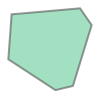

980092958650236384045893957/1250000000000000000000000000
[Segment2D(Point2D(17212493537121/3125000000000, 65741844592031/20000000000000), Point2D(24388661524531/4000000000000, 58039702518293/20000000000000)), Segment2D(Point2D(24388661524531/4000000000000, 58039702518293/20000000000000), Point2D(315808164200431/50000000000000, 295497760372717/100000000000000)), Segment2D(Point2D(315808164200431/50000000000000, 295497760372717/100000000000000), Point2D(327522323422899/50000000000000, 371566437132469/100000000000000)), Segment2D(Point2D(160125989101367/25000000000000, 392515417450937/100000000000000), Point2D(327522323422899/50000000000000, 371566437132469/100000000000000)), Segment2D(Point2D(110980897217057/20000000000000, 385062335148241/100000000000000), Point2D(160125989101367/25000000000000, 392515417450937/100000000000000)), Segment2D(Point2D(17212493537121/3125000000000, 65741844592031/20000000000000), Point2D(110980897217057/20000000000000, 385062335148241/100000000000000))] 


s

In [18]:
### create shapes and edges

from sympy.geometry import Polygon, Segment2D

tiles      = dict()
site_edges = dict()
edges      = set()

for site in sites:
    vs = site_vertices[site]
    if vs is None:
        continue
    
    if len(vs) < 3:
        continue
    
    shape = convex_hull(*vs)
    shape:Polygon
    tiles[site] = shape
    
    
    print('------------')
    print(site)
    print(len(vs), vs)
    print(shape)
    display(shape)
    if isinstance(shape, Segment2D):
        continue
    print(shape.area)
    
    print(shape.sides, '\n')
    site_edges[site] = shape.sides
    edges.update(shape.sides)
    
print('\nsite_edges')
pprint(site_edges)

print('\nedges')
pprint(edges)
print(f'len {len(edges)}')

In [19]:
### draw to image

from PIL import Image, ImageDraw, ImageColor

### colors
red    = ImageColor.getrgb("rgb(100%,0%,0%)")
green  = ImageColor.getrgb("rgb(0%,1000%,0%)")
blue   = ImageColor.getrgb("rgb(0%,0%,100%)")

white  = ImageColor.getrgb("rgb(100%,100%,100%)")
black  = ImageColor.getrgb("rgb(0%,0%,0%)")

### scaling
scale  = 100
margin = 50

iscale = lambda q: (scale*q + 2*margin)
pscale = lambda q: (scale*q + margin)

dot    = lambda p, r: (p.x-r, p.y-r, p.x+r, p.y+r)

### create image
img    = Image.new(mode='RGB', size=(iscale(x_size), iscale(y_size)), color=white)
draw   = ImageDraw.Draw(img)

#################
print('edges')
for edge in edges:
    line = [(pscale(point.x), pscale(y_size-point.y)) for point in edge.points]
    print(*line)
    draw.line(line, fill=black)

#################
print('\nsites:')
for site in sites:
    point = Point(pscale(site.x), pscale(y_size-site.y))
    print(point)
    draw.ellipse(dot(point, 5), fill=red)
    
###
img.save('voromap.jpg', 'JPEG')

edges
(790171419678331/1000000000000, 82030642105513/250000000000) (397839140411379/500000000000, 39939874674633/125000000000)
(313640280194971/500000000000, 49370024455517/125000000000) (343107472685707/500000000000, 406739002019871/1000000000000)
(175725367743231/500000000000, 183721209801361/1000000000000) (171180446082393372913282357241/452675443190460250000000000, 123058591991405789586717642759/905350886380920500000000000)
(5251320037628886779818351533/15092176939623500000000000, 4558594973126388220181648467/30184353879247000000000000) (175725367743231/500000000000, 183721209801361/1000000000000)
(126797901856431/500000000000, 199630472873433/1000000000000) (65955864158943/200000000000, 104273045156903/500000000000)
(188025799507577/1000000000000, 160533494191747/250000000000) (260640816615709/1000000000000, 331115384102017/500000000000)
(1513842402177173065608951721/8998983102398600000000000, 15462266210895003065608951721/17997966204797200000000000) (52988601371551/200000000000, 